In [24]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
from my_utils.my_utils import printMD

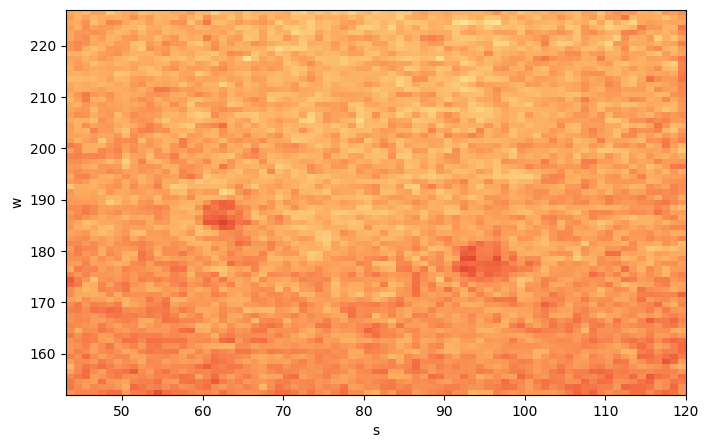

(73, 77)


In [25]:
file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, x, y = file["h7"].to_numpy()

degree_of_rotation = -2.2
wT_rotated = ndimage.rotate(w.T, degree_of_rotation, reshape=False)

fig, ax = plt.subplots(figsize=(8, 5))
mesh = ax.pcolormesh(range(len(x)), y, wT_rotated, cmap="RdYlBu", vmin=200, vmax=400)
ax.set_xlabel("s")
ax.set_ylabel("w")
# ax.set_ylim(2, 75)
ax.set_ylim(152, 227)
ax.set_xlim(43, 120)
# fig.colorbar(mesh)
# plt.grid()
plt.show()
print(wT_rotated[2:75, 43:120].shape)

## Whole picture + rotation to 2.2 degrees

In [26]:
degree_of_rotation = 2.2

file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()

w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T

y = range(w_new.shape[0])   # Rows
x = range(w_new.shape[1])   # Columns

print(w_new.shape)

(400, 124)


### Plotting

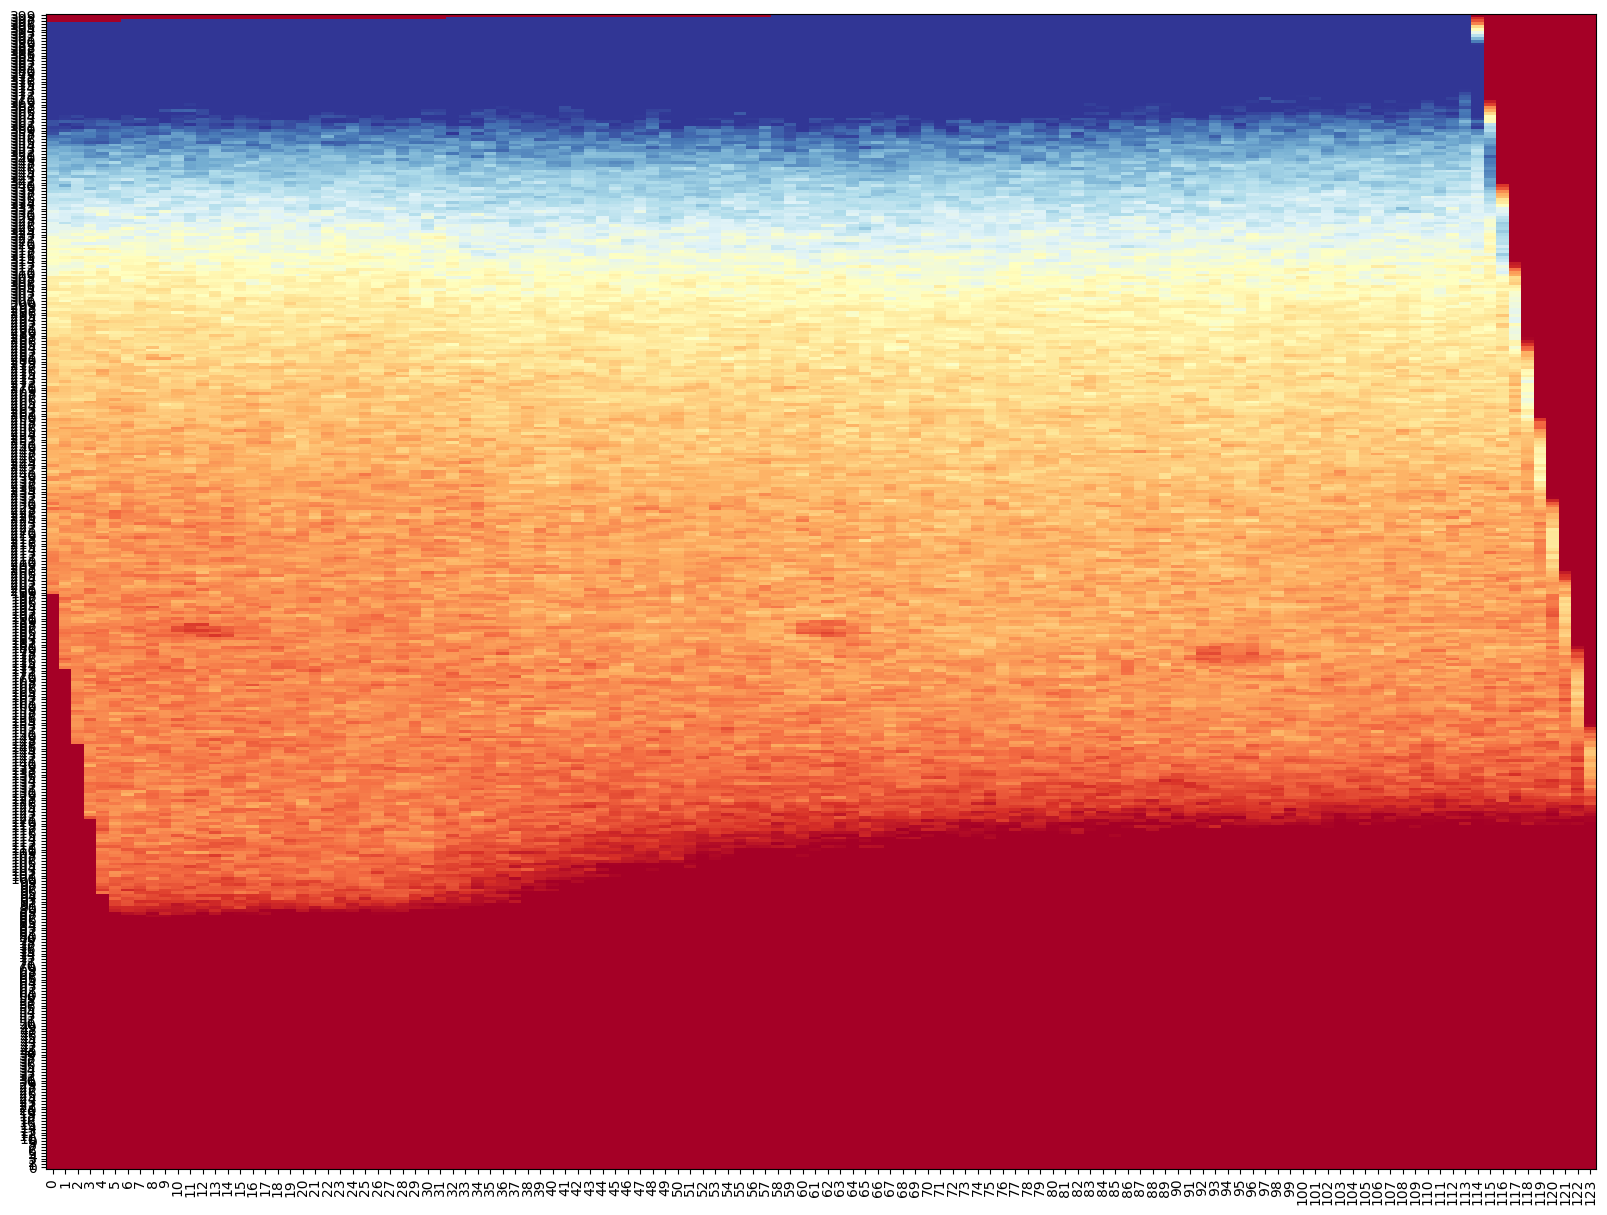

In [27]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.pcolormesh(x, y, w_new, cmap="RdYlBu", vmin=200, vmax=400)
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.show()

## Cropping 2 pictures of same size
1. With grade
2. With markers

### With tungsten grade

### **With tungsten grid**

Box shape in bins: (73, 74)


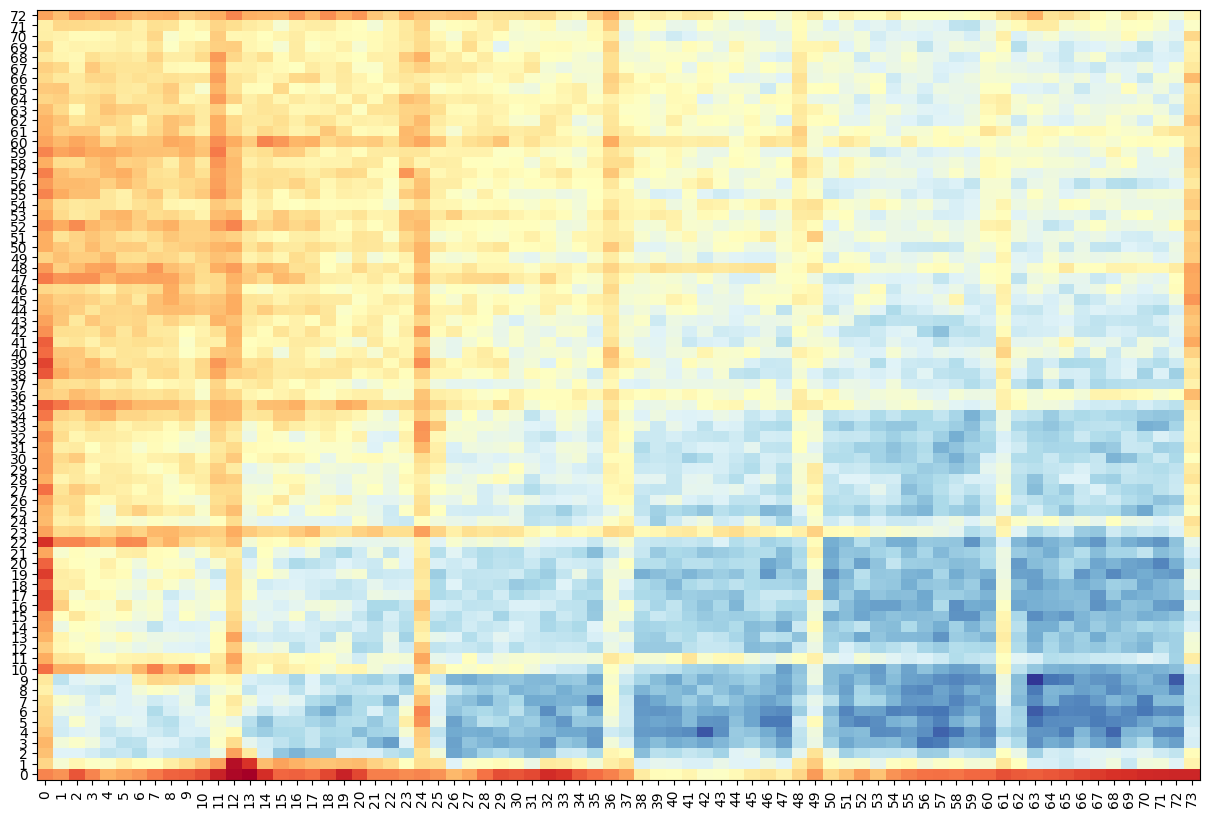

In [28]:
# /export
fig, ax = plt.subplots(figsize=(15, 10))
w_grade = w_new[2:75, 45:119]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu")
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **With tungsten grid**")
print("Box shape in bins:",w_grade.shape)
plt.show()

### With markers (no tungsten)

### **Markers (no grade)**

Box shape in bins: (73, 74)


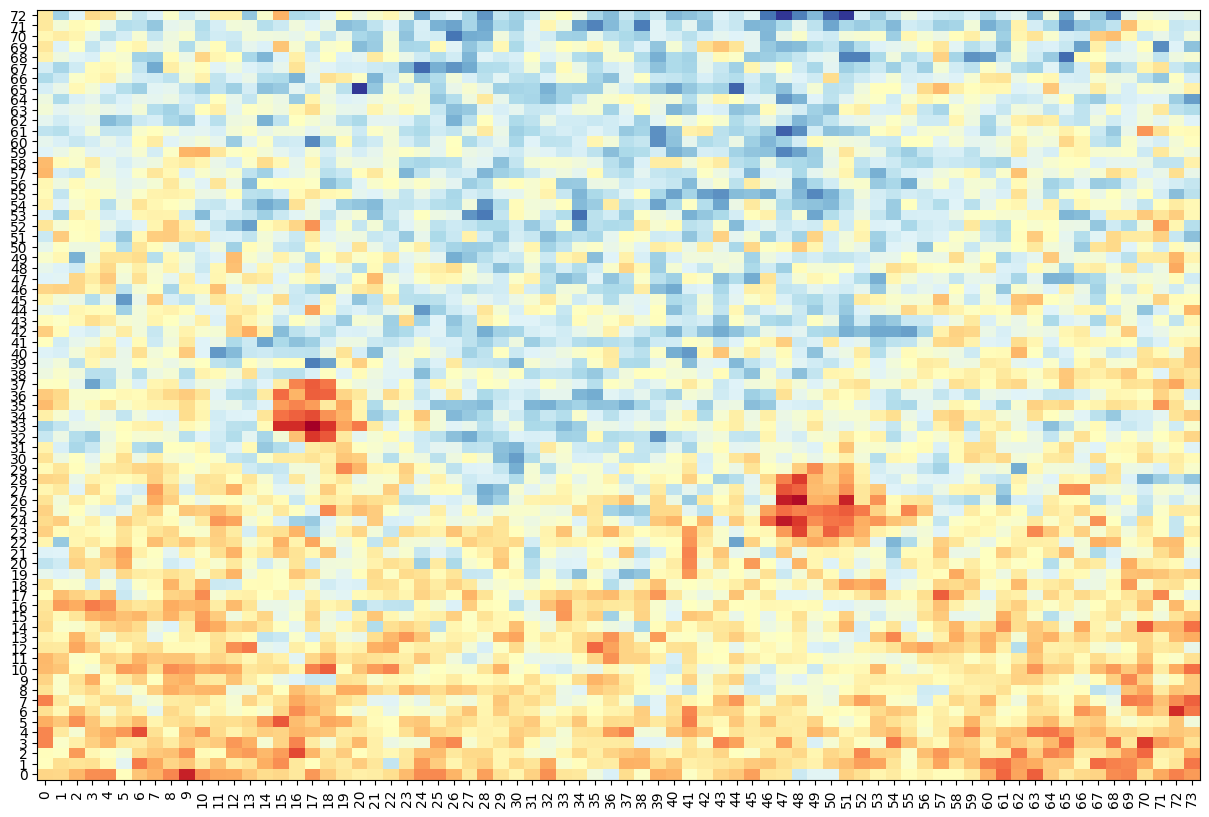

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
w_markers = w_new[152:225, 45:119]
y_markers = range(w_markers.shape[0])   # Rows
x_markers = range(w_markers.shape[1])   # Columns
ax.pcolormesh(x_markers, y_markers, w_markers, cmap="RdYlBu")
plt.xticks(x_markers, rotation=90)
plt.yticks(y_markers)
printMD("### **Markers (no grade)**")
print("Box shape in bins:",w_markers.shape)
plt.show()

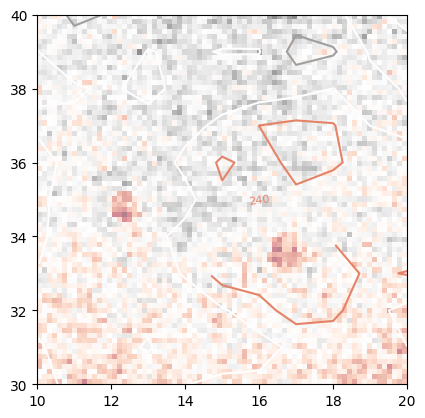

In [30]:
X = np.arange(w_markers.shape[1]) 
Y = np.arange(w_markers.shape[0]) 
Z = w_markers
# plt.contour(X, Y, Z, cmap='RdGy');
# plt.imshow(Z, extent=[0, 74, 0, 73], origin='lower',
#            cmap='RdGy')

contours = plt.contour(X, Y, Z, 3, cmap='RdGy')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[10, 20, 30, 40], origin='lower',
           cmap='RdGy', alpha=0.5)

## Making graphs

### **With tungsten grid**

Shape of summed matrix: (74,)


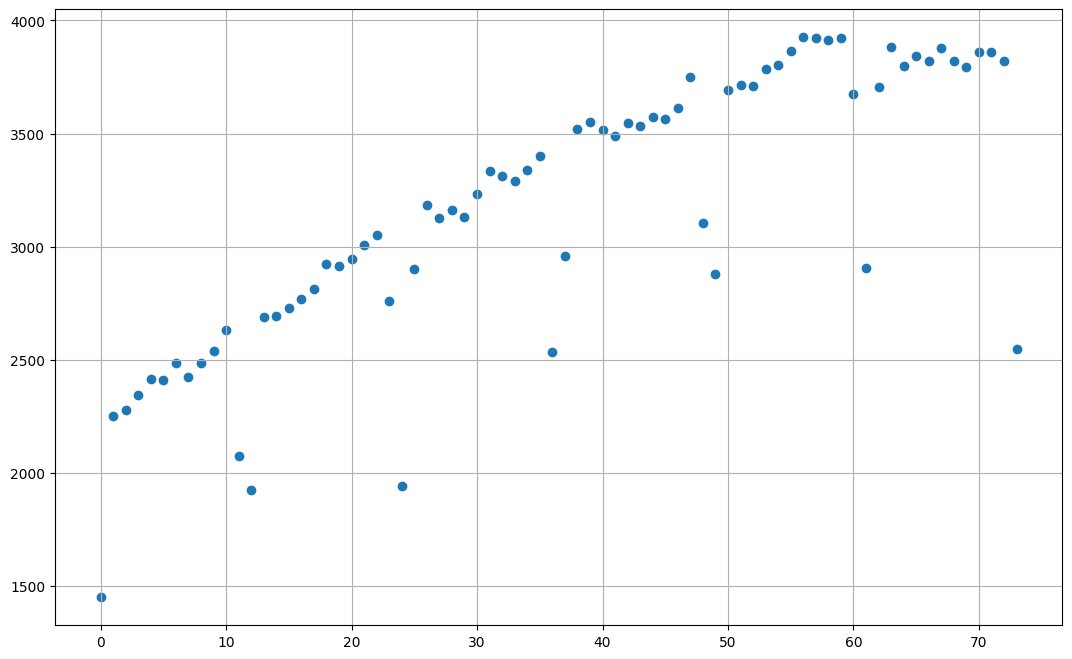

In [31]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_grade_summed = w_grade.sum(axis=_axis)
x_grade_summed = np.arange(len(w_grade_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_grade_summed, w_grade_summed)
# ax.plot(x_grade_summed, w_grade_summed, '--', lw=1, c='r')
printMD("### **With tungsten grid**")
print("Shape of summed matrix:", w_grade_summed.shape)
plt.grid()
plt.show()

### **Markers no grid**

Shape of summed matrix: (74,)


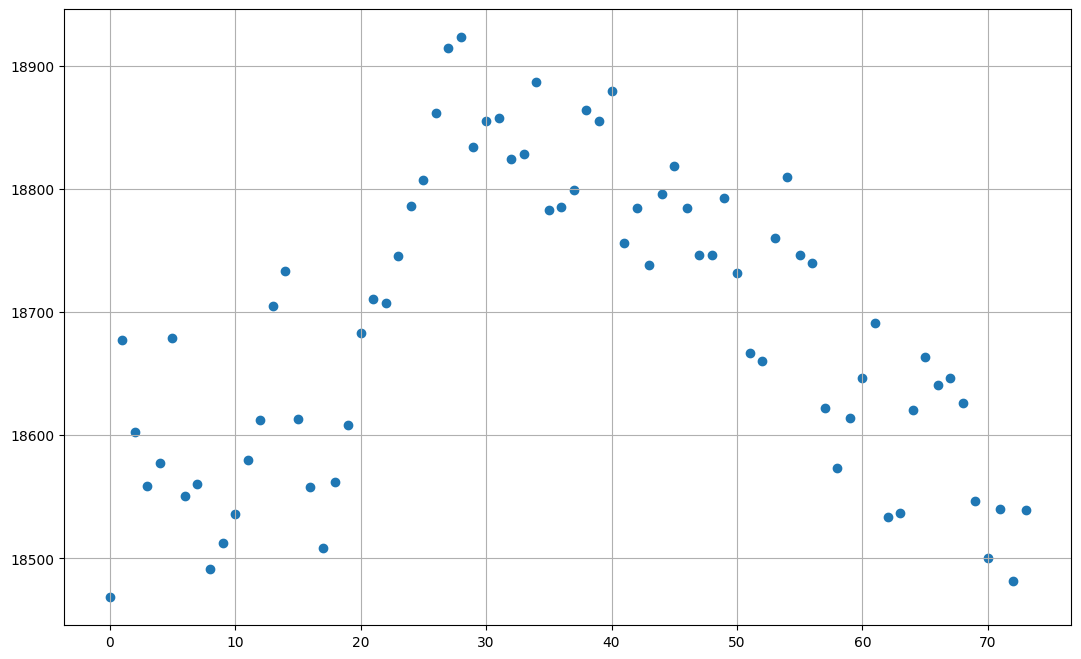

In [32]:
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
# ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **Markers no grid**")
print("Shape of summed matrix:", w_markers_summed.shape)
# ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
# s="""It appears to be, that using WHOLE box for making such kind of graph is quite a bad idea
# NOTHING is clear on this graph
# Going to use a strip of data""",
# fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

### **With tungsten grade**

Shape of summed matrix: (74,)


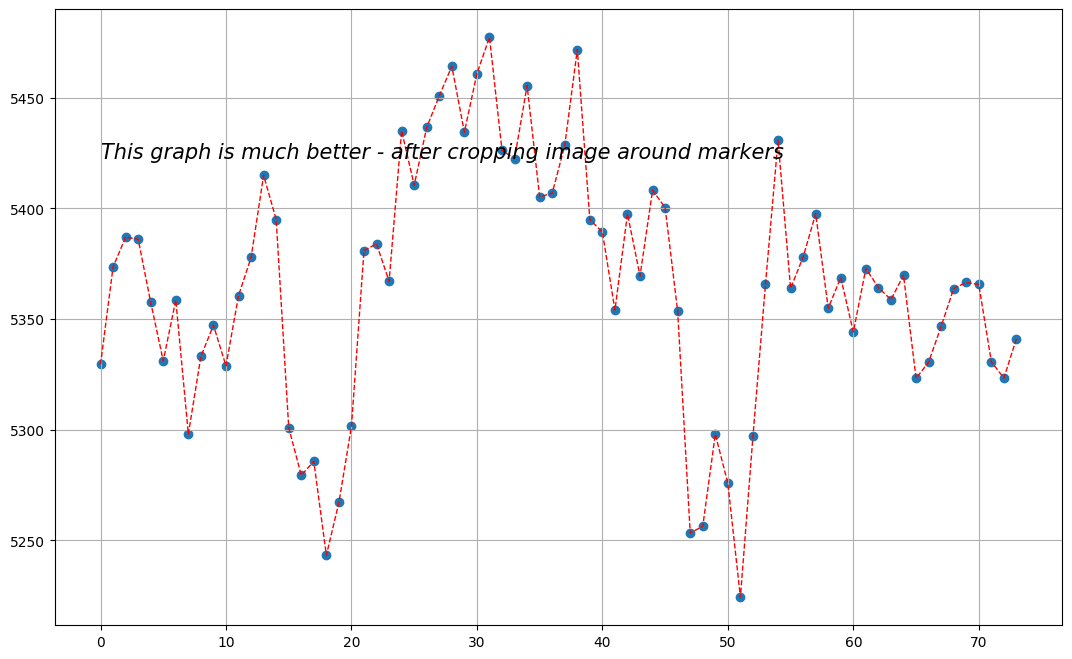

In [33]:
_axis = 0 # 0 - keeps x; 1 - keeps y
# Coordinates                   Y   X
w_markers_summed = w_markers[20:41, :].sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_markers_summed.shape)
ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
s="""This graph is much better - after cropping image around markers""",
fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

### **With tungsten grade**

Shape of summed matrix: (74,)


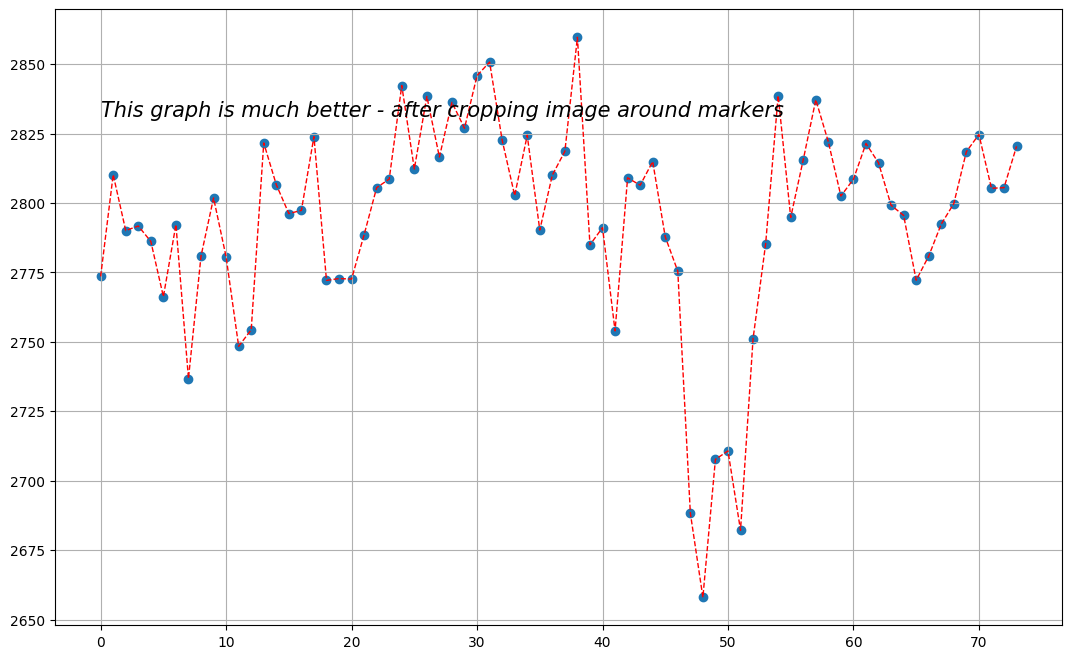

In [34]:
# w_new[172:193, 45:119]
_axis = 0 # 0 - keeps x; 1 - keeps y
# Coordinates               Y       X
# w_markers_summed = w_new[172:193, 27:-5].sum(axis=_axis)
w_markers_summed = w_new[172:183, 45:119].sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_markers_summed, w_markers_summed)
ax.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
printMD("### **With tungsten grade**")
print("Shape of summed matrix:", w_markers_summed.shape)
ax.text(x=x_markers_summed.min(), y = w_markers_summed.max()-w_markers_summed.max()*0.01, 
s="""This graph is much better - after cropping image around markers""",
fontsize=15, color='black', style='oblique')
plt.grid()
plt.show()

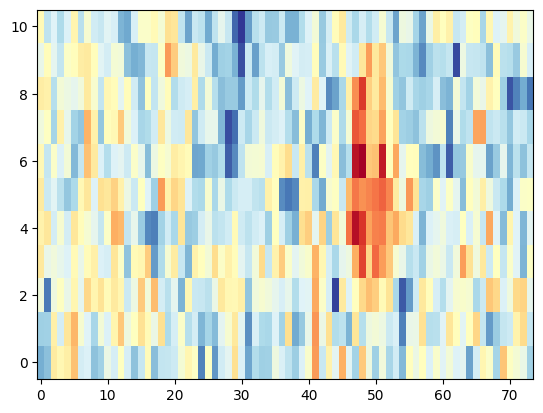

In [35]:
w_markers = w_new[172:183, 45:119]
y_markers = range(w_markers.shape[0])   # Rows
x_markers = range(w_markers.shape[1])   # Columns
plt.pcolormesh(x_markers, y_markers, w_markers, cmap="RdYlBu")

## Left Marker

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [  10.6344728   -71.31675575 2059.32557678]


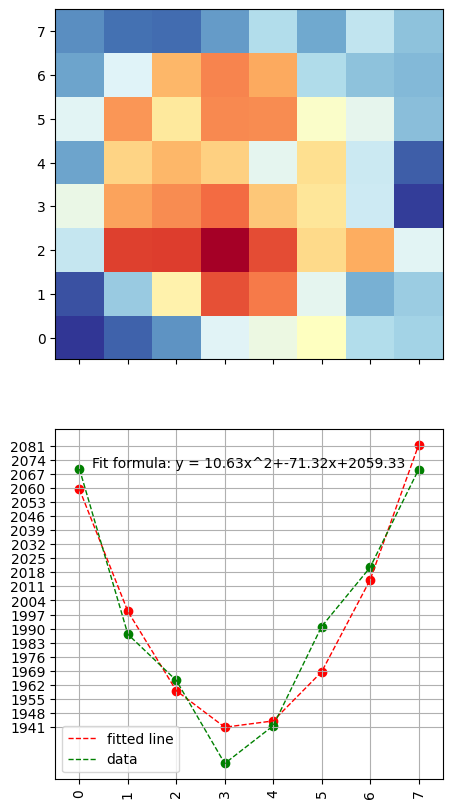

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 14:-52]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(0.25, 2070, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(y_pred.min(), y_pred.max(), 7))
plt.grid()
plt.show()

### lmfit polinomialmodel

In [37]:
from lmfit.models import ExponentialModel, PolynomialModel, LinearModel


mod_poly = PolynomialModel(degree=2, prefix='exp_')
# mod_gauss = GaussianModel(prefix='g1_')

# sum components to make a composite model (add more if needed)
model  = mod_poly

# create fitting parameters by name, give initial values
# params = model.make_params(g1_amplitude=5, g1_center=55, g1_sigma=5, 
#                            exp_amplitude=5, exp_decay=10)

params = model.guess(w_markers_summed, x=x_markers_summed)
# pars = mod.make_params(amp=1925, cen=5, wid=5)

# result = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# do fit
result = model.fit(w_markers_summed, params, x=x_markers_summed)

# print out fitting statistics, best-fit parameters, uncertainties,....
result.fit_report()

"[[Model]]\n    Model(polynomial, prefix='exp_')\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 5\n    # data points      = 8\n    # variables        = 3\n    chi-square         = 1282.56002\n    reduced chi-square = 256.512004\n    Akaike info crit   = 46.6173747\n    Bayesian info crit = 46.8556993\n    R-squared          = 0.93801680\n[[Variables]]\n    exp_c0:  2059.32558 +/- 13.4794660 (0.65%) (init = 2059.326)\n    exp_c1: -71.3167557 +/- 8.99574494 (12.61%) (init = -71.31676)\n    exp_c2:  10.6344728 +/- 1.23566057 (11.62%) (init = 10.63447)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(exp_c1, exp_c2) = -0.962\n    C(exp_c0, exp_c1) = -0.793\n    C(exp_c0, exp_c2) = 0.642"

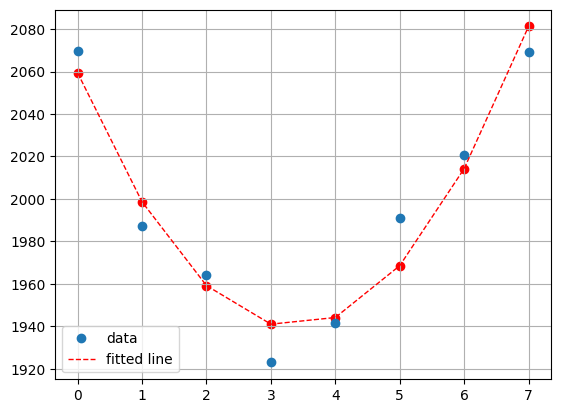

In [38]:
plt.plot(x_markers_summed, w_markers_summed, 'o', label='data')
plt.scatter(x_markers_summed, y_pred, c='r')
plt.plot(x_markers_summed, result.best_fit, '--', lw=1, c='r', label='fitted line')
# plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
# plt.plot(x_markers_summed, result.best_fit, '--', label='best fit')
plt.legend()
plt.grid()
plt.show()

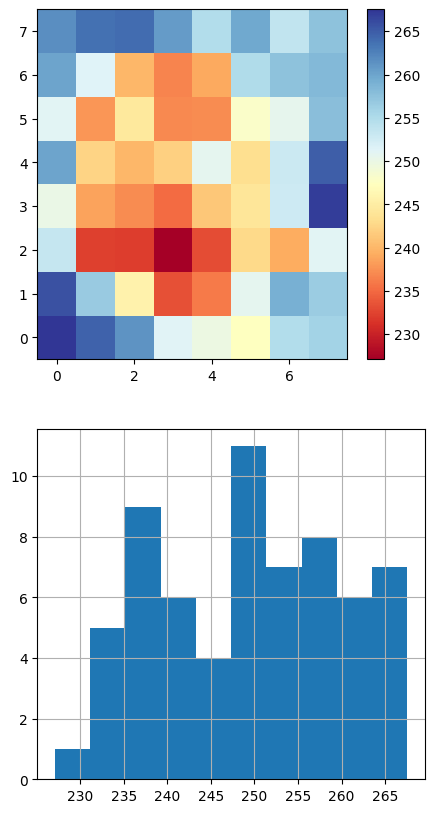

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_markers = w_new[152:225, 45:119]
w_left = w_markers[31:39, 14:-52]

# w_left = np.where(w_left<=trsh, w_left, w_left*1.5)
mesh = ax[0].pcolormesh(np.arange(w_left.shape[1]), np.arange(w_left.shape[0]), w_left, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_left.ravel(), bins=10)
plt.grid()

plt.show()

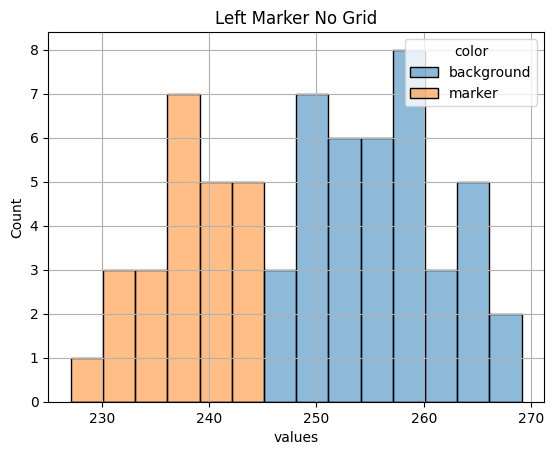

In [22]:

df_left = pd.DataFrame(w_left.ravel())
trsh = 245
df_left['color'] = np.where(df_left[0]<=trsh, "marker", "background")
df_left.rename(columns={0: "values"}, inplace=True)
sns.histplot(data=df_left, x="values", hue="color", binwidth=3)
plt.title("Left Marker No Grid")
plt.grid()
plt.show()

## Right Marker

Shape of image in bins:  (10, 50)


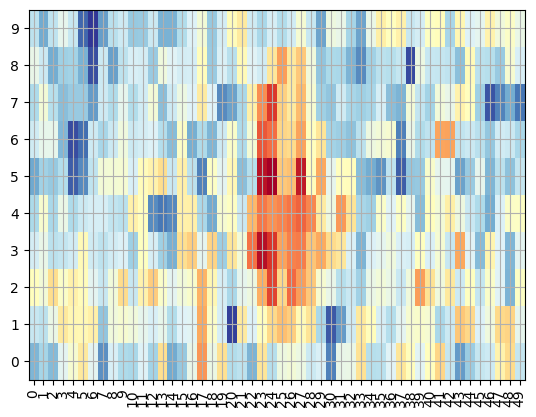

In [20]:
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

plt.pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
print("Shape of image in bins: ", w_markers_cropped.shape)
plt.grid()
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)
plt.show()

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Coefficient of 2nd degree polynomial:  [ 1.04261538e-01 -5.51736419e+00  2.59369342e+03]


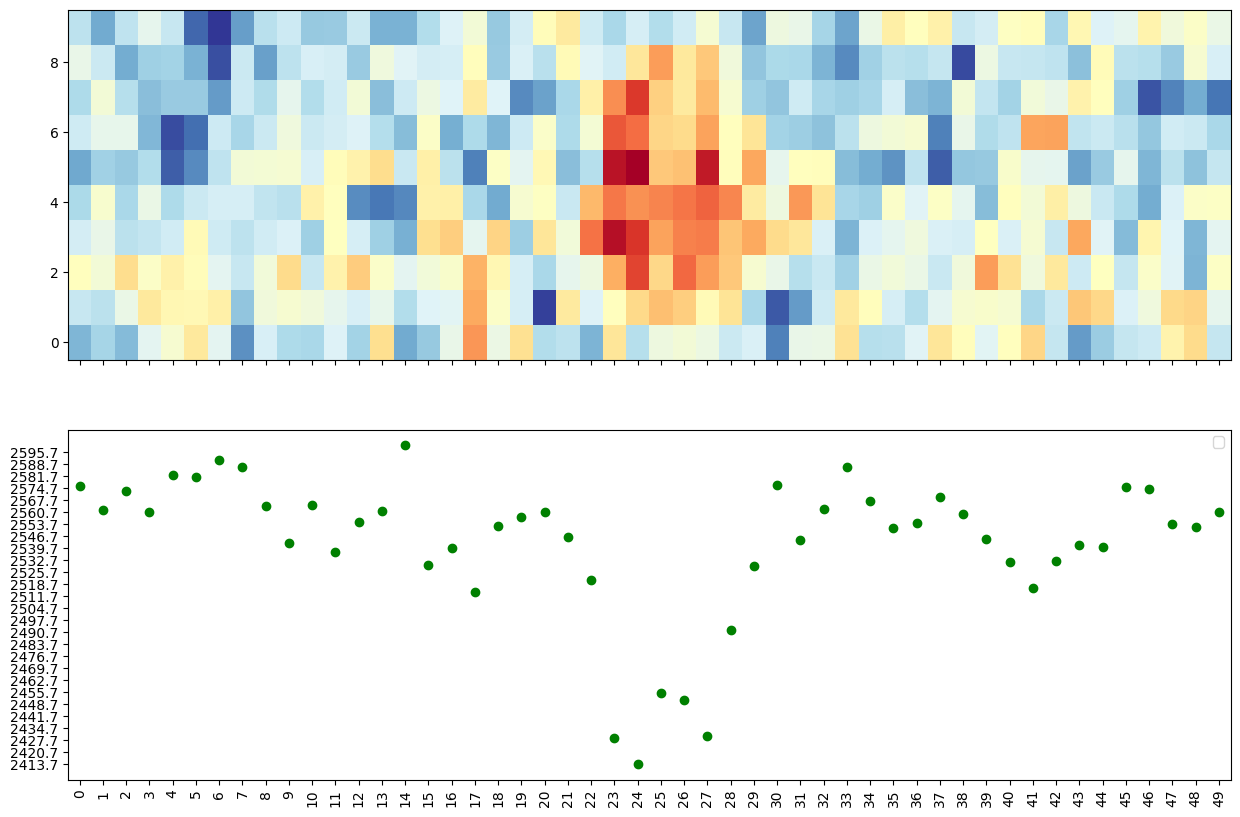

In [200]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
# y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
# ax[1].scatter(x_markers_summed, y_pred, c='r')
# ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
# ax[1].text(0.25, 2420, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
# ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
# plt.grid()
plt.show()

## **No Grid + Marker (gopa3)**

In [218]:
degree_of_rotation = -2.2
file = uproot.open("root_files/gopa3-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()
w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T
w_markers = w_new[152:225, 45:119]
w_left  = w_markers[30:40, :32]
w_right = w_markers[21:31, 24:]
print(f"left: {w_left.shape}, right: {w_right.shape}")


left: (10, 32), right: (10, 50)


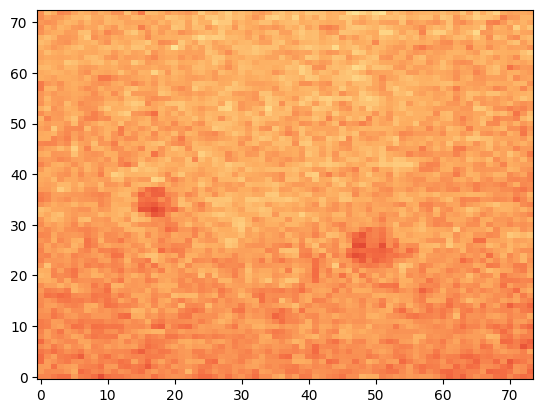

In [232]:
w_cm = w_markers
y_cm = range(w_cm.shape[0])   # Rows      (this, _)
x_cm = range(w_cm.shape[1])   # Columns   (_, this)
plt.pcolormesh(x_cm, y_cm, w_cm, cmap="RdYlBu", vmin=200, vmax=400)
# plt.grid()
plt.show()

### **Left Marker**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


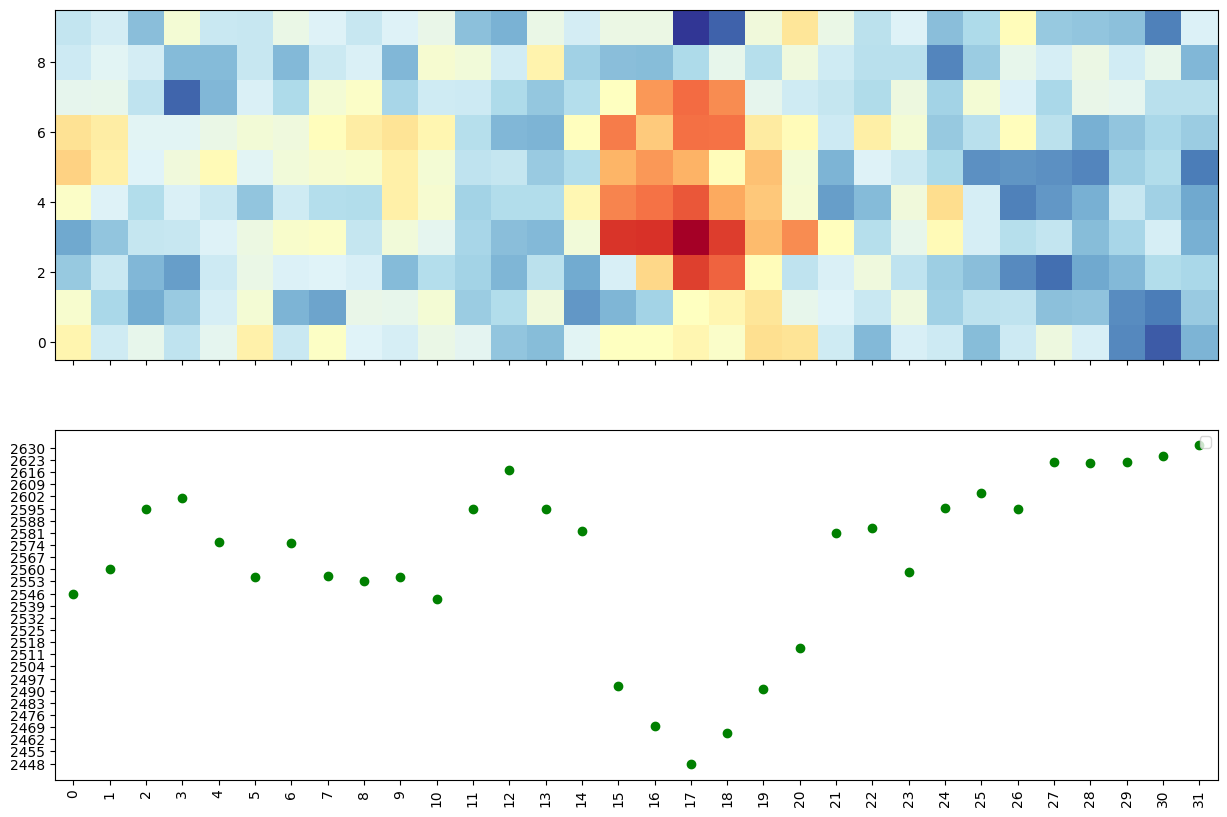

In [222]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

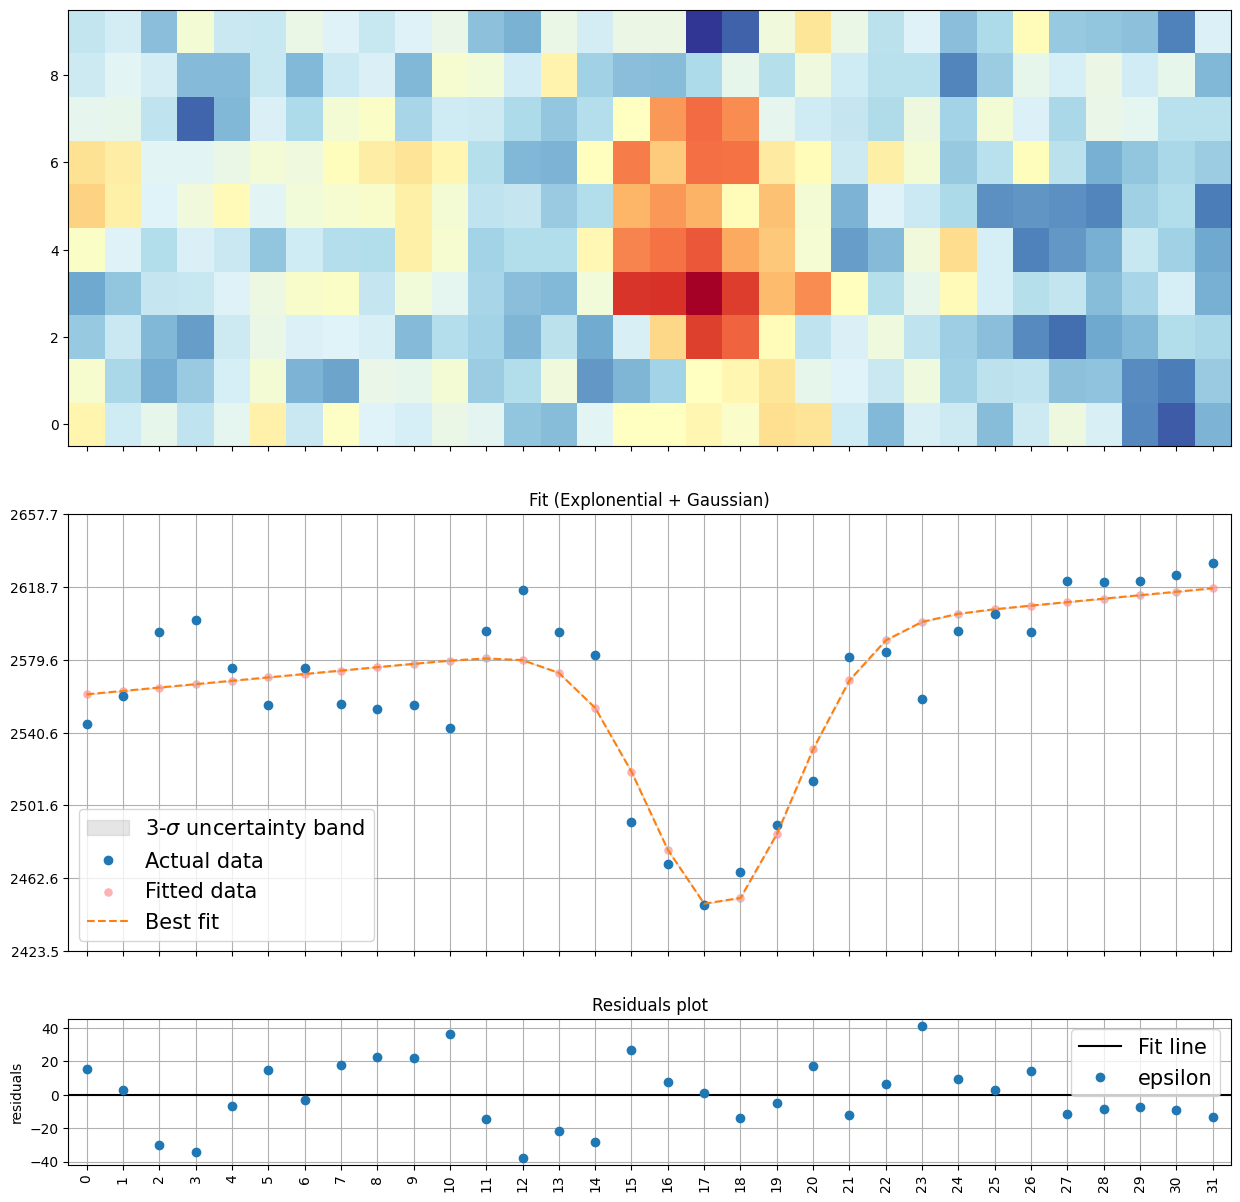

name,value,initial value,min,max,vary,expression
exp_amplitude,2561.15053,2546.183723407076,-inf,inf,True,
exp_decay,-1411.95429,-2004.7420624584001,-inf,inf,True,
g1_amplitude,-738.009265,1.0,-inf,inf,True,
g1_center,17.4652781,17,14.0000000,20.0000000,True,
g1_sigma,2.00000003,4,2.00000000,inf,True,
g1_fwhm,4.70964007,9.41928,-inf,inf,False,2.3548200*g1_sigma
g1_height,-147.211554,0.099735575,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [230]:
from lmfit.models import GaussianModel, ExponentialModel

# Data
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=17, min=14, max=20)
pars['g1_sigma'].set(value=4, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                   out.best_fit-dely, 
                   out.best_fit+dely, 
                   color="#ABABAB",
                   label='3-$\sigma$ uncertainty band',
                   alpha=0.3)
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend(fontsize=15)

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'], fontsize=15)

plt.show()

out.params

### **Right Marker**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


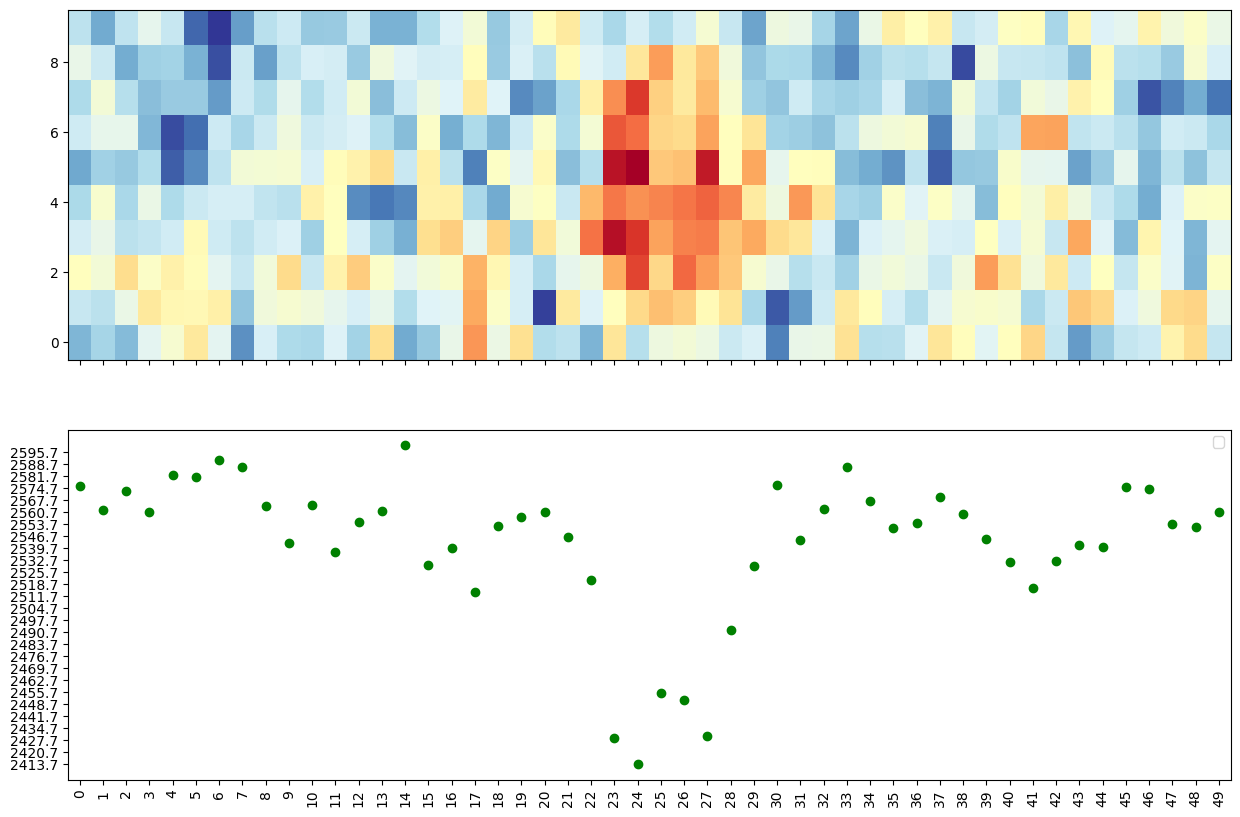

In [225]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

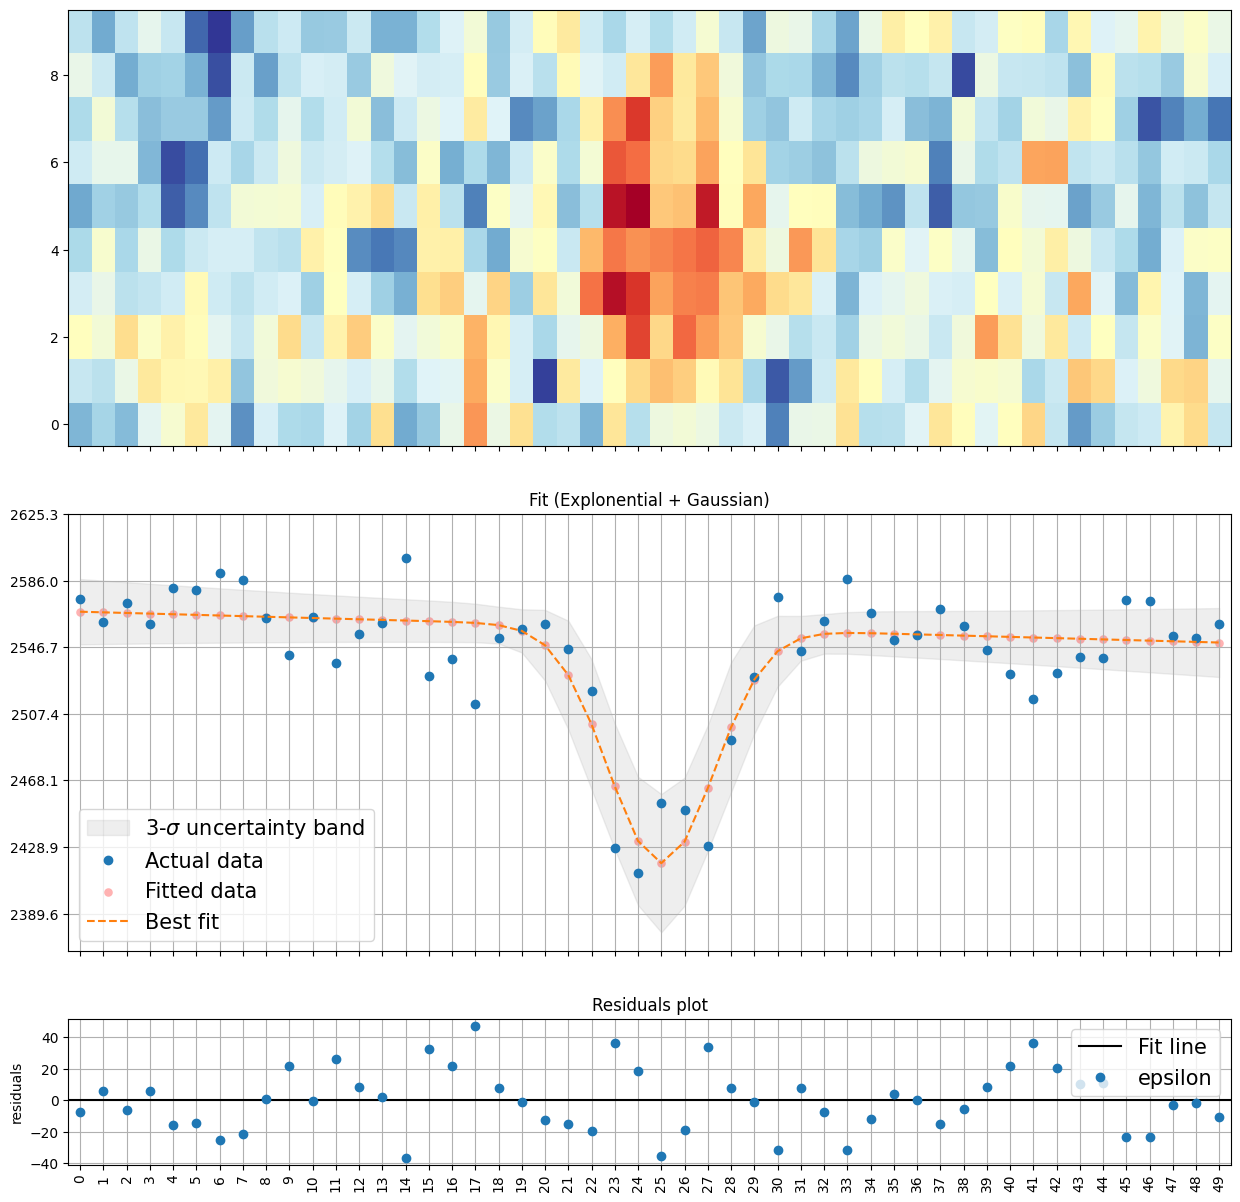

name,value,standard error,relative error,initial value,min,max,vary,expression
exp_amplitude,2567.74971,6.07173602,(0.24%),2552.4402199178908,-inf,inf,True,
exp_decay,6891.60851,3827.57890,(55.54%),6257.16134746084,-inf,inf,True,
g1_amplitude,-791.480225,83.5753300,(10.56%),1.0,-inf,inf,True,
g1_center,24.9941191,0.24191383,(0.97%),25,20.0000000,30.0000000,True,
g1_sigma,2.26928291,0.25345269,(11.17%),3,2.00000000,inf,True,
g1_fwhm,5.34375279,0.59683546,(11.17%),7.06446,-inf,inf,False,2.3548200*g1_sigma
g1_height,-139.143048,13.0201931,(9.36%),0.13298076666666667,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [231]:
from lmfit.models import GaussianModel, ExponentialModel

w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=25, min=20, max=30)
pars['g1_sigma'].set(value=3, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band',
                 alpha=0.2)
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend(fontsize=15)

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'], fontsize=15)

plt.show()

out.params

In [186]:
def fit_my_data(w_markers_cropped, 
                g1_center:dict={"value":25, "min":20, "max":30}, 
                g1_sigma:dict={"value":3, "min":2}):
    # Data
    _axis = 0 # 0 - keeps x; 1 - keeps y
    y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
    x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
    w_markers_summed = w_markers_cropped.sum(axis=_axis)
    x_markers_summed = np.arange(len(w_markers_summed))

    # Model 
    exp_mod = ExponentialModel(prefix='exp_')
    pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

    gauss1 = GaussianModel(prefix='g1_')
    pars.update(gauss1.make_params())

    pars['g1_center'].set(value=g1_center['value'], min=g1_center['min'], max=g1_center['max'])
    pars['g1_sigma'].set(value=g1_center['value'], min=g1_center['min'])

    mod = gauss1 + exp_mod
    init = mod.eval(pars, x=x_markers_summed)
    out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

    # Printing section
    printMD("**Results report**")
    fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})
    # Colormesh
    ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
    plt.xticks(x_markers_markers_cropped, rotation=90)

    # Fitted graph
    ## Uncertainty
    dely = out.eval_uncertainty(sigma=3)
    ax[1].fill_between(x_markers_summed, 
                    out.best_fit-dely, 
                    out.best_fit+dely, 
                    color="#ABABAB",
                    label='3-$\sigma$ uncertainty band',
                    alpha=0.2)
    ## Graph itself
    ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
    ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
    ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
    ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                                out.data.max()+out.data.max()*0.01, 
                                7))
    ax[1].grid()
    ax[1].set_title("Fit (Explonential + Gaussian)")
    ax[1].legend()

    # Residuals
    out.plot_residuals(ax=ax[2], title="Residuals plot")
    ax[2].grid()
    ax[2].legend(['Fit line', 'epsilon'])

    plt.show()

In [185]:
!pip list

Package                  Version
------------------------ -----------
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
asteval                  0.9.28
asttokens                2.2.1
attrs                    22.1.0
awkward                  2.0.2
awkward-cpp              4
backcall                 0.2.0
beautifulsoup4           4.11.1
bleach                   5.0.1
cffi                     1.15.1
comm                     0.1.2
contourpy                1.0.6
cycler                   0.11.0
debugpy                  1.6.4
decorator                5.1.1
defusedxml               0.7.1
entrypoints              0.4
executing                1.2.0
fastjsonschema           2.16.2
fonttools                4.38.0
future                   0.18.2
idna                     3.4
importlib-metadata       5.2.0
importlib-resources      5.10.1
ipykernel                6.19.4
ipython                  8.7.0
ipython-genutils         0.2.0
ipywidgets               8.

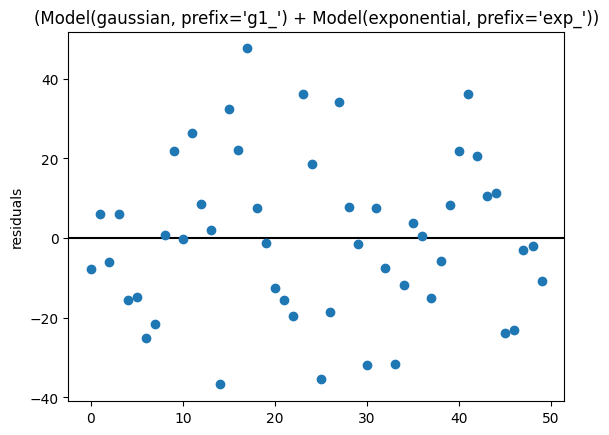

AxesSubplot(0.125,0.11;0.775x0.77)


array([ -7.74101277,   5.99579849,  -5.99292212,   6.14853826,
       -15.66014263, -14.73463862, -25.11718606, -21.53507988,
         0.67891626,  21.93398202,  -0.31846663,  26.36688217,
         8.64065479,   1.95735099, -36.75754557,  32.44280571,
        22.09127401,  47.59510521,   7.58338473,  -1.30408927,
       -12.57064384, -15.44064194, -19.56575764,  36.15961935,
        18.70202016, -35.4251335 , -18.66735165,  34.03733113,
         7.69965955,  -1.37950109, -31.97263179,   7.65530335,
        -7.57268097, -31.56013295, -11.70325944,   3.71274399,
         0.44503629, -15.11773204,  -5.71793122,   8.36151436,
        21.84652248,  36.219279  ,  20.54521423,  10.57335163,
        11.20945291, -23.73154052, -23.20397438,  -2.88533891,
        -2.06713803, -10.85947916])

In [183]:
slkml = out.plot_residuals()
plt.show()
print(slkml)
out.residual

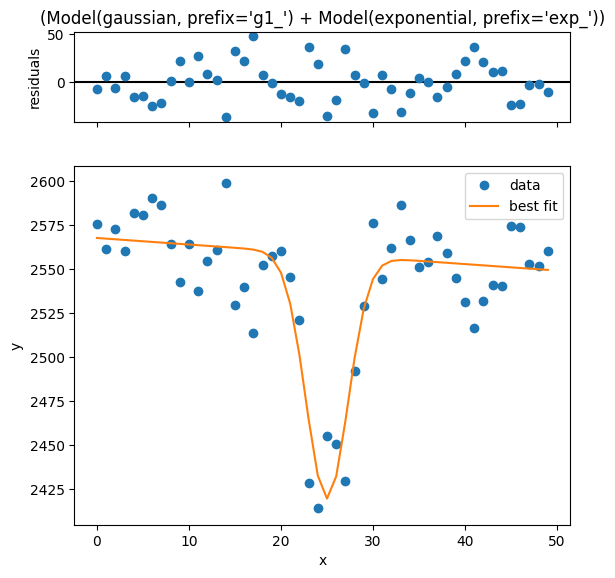

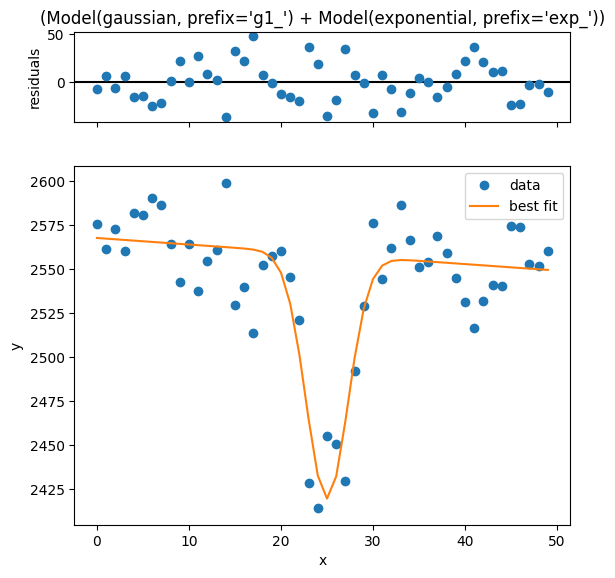

In [112]:
# out.plot_fit()
# out.plot_residuals()
out.plot()

In [184]:
!echo "hello"

hello


**Linear Model:**


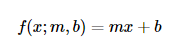

**QuadraticModel:**

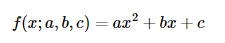

**Parameters in functions**

parameter names: ['linear_slope', 'linear_intercept', 'quadratic_a', 'quadratic_b', 'quadratic_c']
independent variables: ['x']


**After hinting params**

Parameters([('linear_slope', <Parameter 'linear_slope', value=0.3, bounds=[0.1:1.0]>), ('linear_intercept', <Parameter 'linear_intercept', value=2570, bounds=[2000:3000]>), ('quadratic_a', <Parameter 'quadratic_a', value=10, bounds=[5:20]>), ('quadratic_b', <Parameter 'quadratic_b', value=-70, bounds=[-90:-50]>), ('quadratic_c', <Parameter 'quadratic_c', value=2050, bounds=[2000:2100]>)])


**Results report**

[[Model]]
    (Model(linear, prefix='linear_') + Model(parabolic, prefix='quadratic_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7204
    # data points      = 50
    # variables        = 5
    chi-square         = 8.3696e+08
    reduced chi-square = 18599012.3
    Akaike info crit   = 841.662926
    Bayesian info crit = 851.223041
    R-squared          = -9637.75874
##  Warning: uncertainties could not be estimated:
    linear_slope:      at boundary
    linear_intercept:  at boundary
    quadratic_a:       at boundary
    quadratic_b:       at boundary
    quadratic_c:       at boundary
[[Variables]]
    linear_slope:      0.10000001 (init = 0.3)
    linear_intercept:  2000.00000 (init = 2570)
    quadratic_a:       5.00000210 (init = 10)
    quadratic_b:      -90.0000000 (init = -70)
    quadratic_c:       2000.00000 (init = 2050)


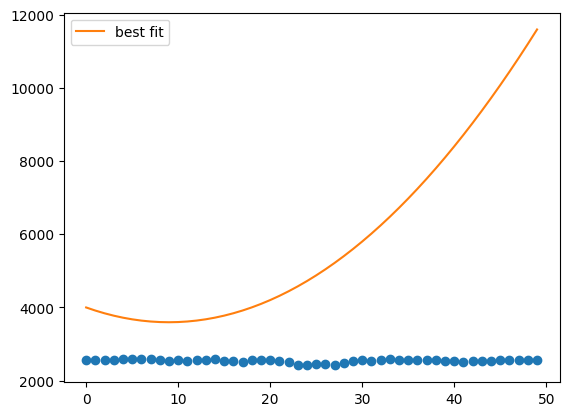

In [78]:
from lmfit.models import QuadraticModel, LinearModel, ExponentialModel

# Init Model
model = (LinearModel(prefix='linear_') +
         QuadraticModel(prefix='quadratic_'))

printMD("**Parameters in functions**")
print(f'parameter names: {model.param_names}')
print(f'independent variables: {model.independent_vars}')


params = linmod.make_params(a=0.3, b=2570)
model.set_param_hint('linear_slope', value=0.3, min=0.1, max=1.0)
model.set_param_hint('linear_intercept', value=2570, min=2000, max=3000)
model.set_param_hint("quadratic_a", value=10, min=5, max=20)
model.set_param_hint("quadratic_b", value=-70, min=-90, max=-50)
model.set_param_hint("quadratic_c", value=2050, min=2000, max=2100)
params = model.make_params()

printMD("**After hinting params**")
print(params)
# # Parameters
# params = model.make_params(linear_slope=0.1, linear_intercept=2500,
#                            quadratic_a=10,
#                            quadratic_b=-70,
#                            quadratic_c=2500)
# Data
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]

w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

result = model.fit(w_markers_summed, params=params, x=x_markers_summed)

# Printing part
printMD("**Results report**")
print(result.fit_report())

plt.plot(x_markers_summed, w_markers_summed, 'o')
# plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
plt.plot(x_markers_summed, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

**Parameters in functions**

parameter names: ['a', 'b']
independent variables: ['x']
parameter names: ['a', 'b', 'c']
independent variables: ['x']


**After hinting params**

Parameters([('a', <Parameter 'a', value=10, bounds=[5:20]>), ('b', <Parameter 'b', value=-70, bounds=[-90:-50]>), ('c', <Parameter 'c', value=2050, bounds=[2000:2100]>)])


**Results report**

[[Model]]
    Model(linear_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 50
    # variables        = 3
    chi-square         = 2.2551e+08
    reduced chi-square = 4798153.52
    Akaike info crit   = 772.093316
    Bayesian info crit = 777.829385
    R-squared          = -2596.11219
##  Warning: uncertainties could not be estimated:
    a:  at boundary
    b:  at boundary
    c:  at initial value
[[Variables]]
    a:  19.9999996 (init = 10)
    b: -50.0000000 (init = -70)
    c:  2050.00000 (init = 2050)


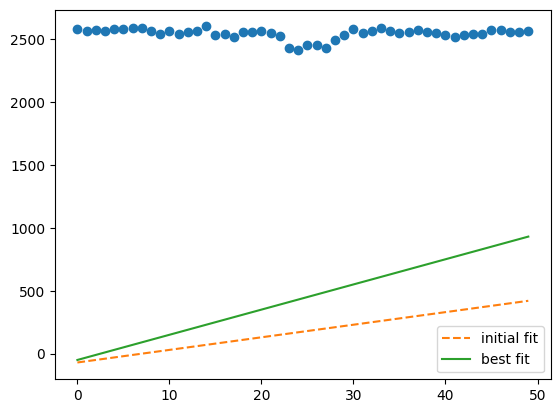

In [65]:
from lmfit import Model

_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]

w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

def linear_model(x, a, b):
    return a*x+b
def poly_2nd(x, a, b, c):
    return a*x*x+b*x+c

printMD("**Parameters in functions**")
linmod = Model(linear_model)
print(f'parameter names: {linmod.param_names}')
print(f'independent variables: {linmod.independent_vars}')

poly_mod = Model(poly_2nd)
print(f'parameter names: {poly_mod.param_names}')
print(f'independent variables: {poly_mod.independent_vars}')

params = linmod.make_params(a=0.3, b=2570)
linmod.set_param_hint('a', value=0.3, min=0.1, max=1.0)
linmod.set_param_hint('b', value=2570, min=2000, max=3000)
params = linmod.make_params()

poly_mod.set_param_hint("a", value=10, min=5, max=20)
poly_mod.set_param_hint("b", value=-70, min=-90, max=-50)
poly_mod.set_param_hint("c", value=2050, min=2000, max=2100)
params = poly_mod.make_params()
printMD("**After hinting params**")
print(params)

result = linmod.fit(w_markers_summed, params, x=x_markers_summed)
printMD("**Results report**")
print(result.fit_report())

plt.plot(x_markers_summed, w_markers_summed, 'o')
plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
plt.plot(x_markers_summed, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()
# poly_mod.make_params(a=0.3, b=3, c=0)

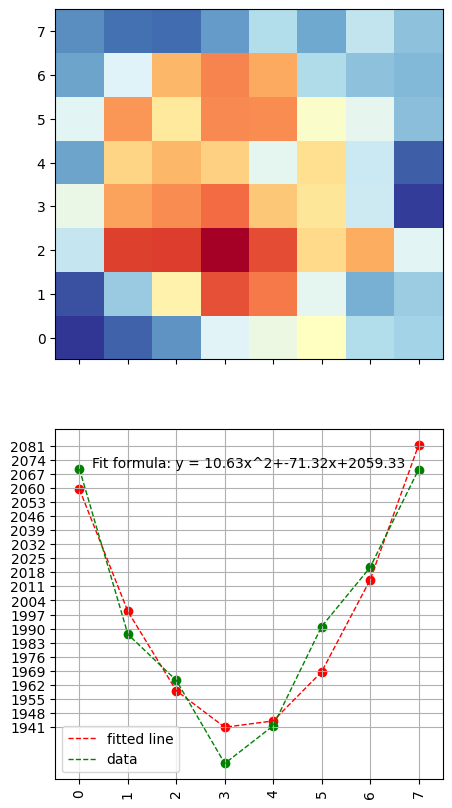

### The same as above, but lmfit

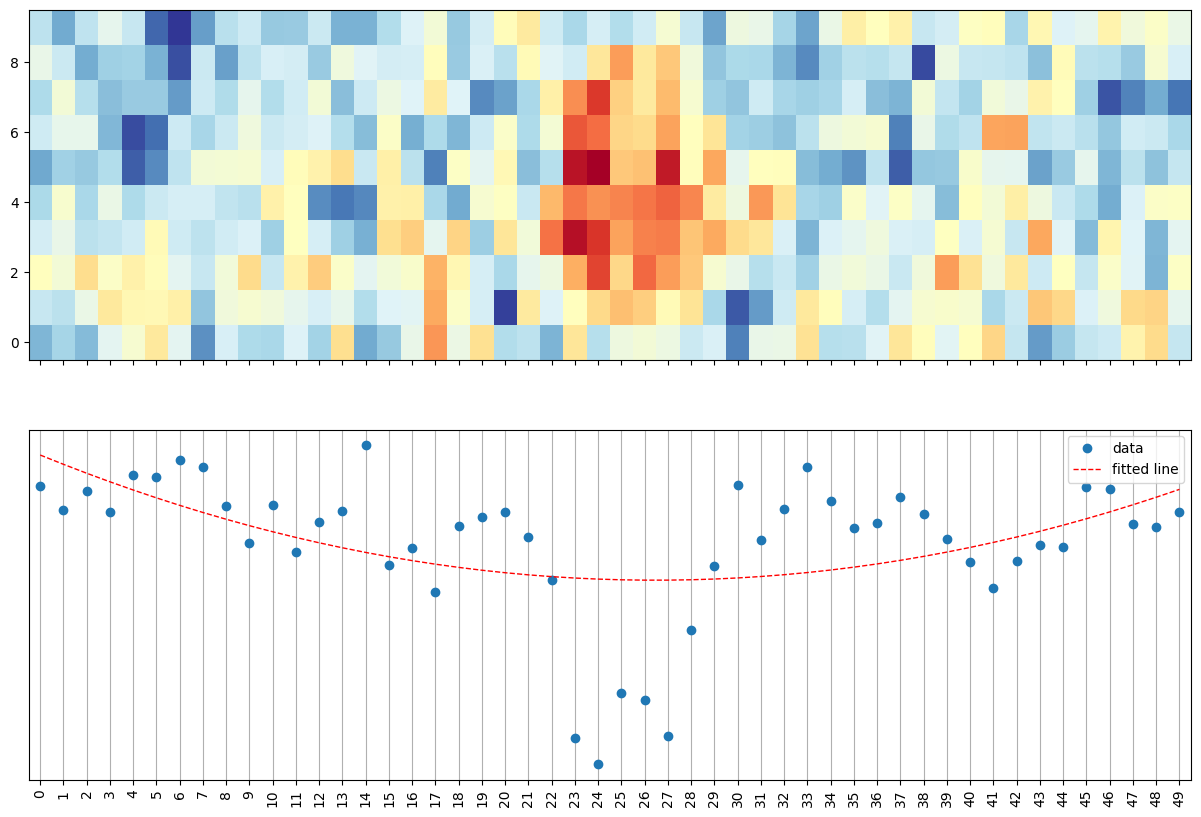

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)


# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

## Fitting the model
mod_poly = PolynomialModel(degree=2, prefix='poly_')
# pars = mod_poly.guess(w_markers_summed, x=x_markers_summed)
mod_expon = ExponentialModel(prefix='exp_')

# pars = mod_expon.guess(w_markers_summed, x=x_markers_summed)

# pars = mod_expon.update(w_markers_summed, x=x_markers_summed)
# sum components to make a composite model (add more if needed)
model  = mod_expon + mod_poly

# create fitting parameters by name, give initial values
# params = model.make_params(g1_amplitude=5, g1_center=55, g1_sigma=5, 
#                            exp_amplitude=5, exp_decay=10)

# params = model.make_params()

# do fit
# pars = model.make_params(poly_c0=2060, poly_c1=10, poly_c2=-71)
result = model.fit(w_markers_summed, pars, x=x_markers_summed, poly_c0=2060, poly_c1=10, poly_c2=-71)

# print out fitting statistics, best-fit parameters, uncertainties,....
result.fit_report()
# plotting
ax[1].plot(x_markers_summed, w_markers_summed, 'o', label='data')
# ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, result.best_fit, '--', lw=1, c='r', label='fitted line')
# plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
# plt.plot(x_markers_summed, result.best_fit, '--', label='best fit')
plt.legend()
plt.grid()

# ## Fitted line
# printMD("### **Fitting line to one marker**")
# z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
# print("Coefficient of 2nd degree polynomial: ",z)
# y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
# ax[1].scatter(x_markers_summed, y_pred, c='r')
# ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
# ax[1].text(0.25, 2420, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
# ## Actual data
# ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
# # ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
# plt.legend()
# plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
# # plt.grid()
plt.show()

### Right Marker Hist

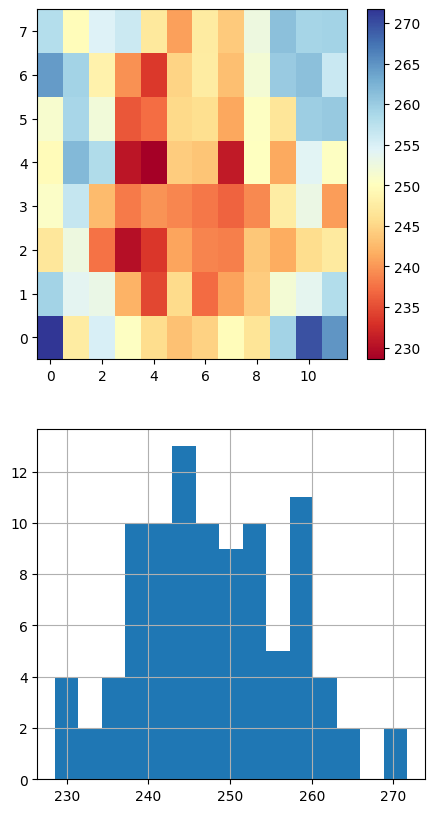

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
#                 Y     X
w_right = w_markers_cropped

mesh = ax[0].pcolormesh(np.arange(w_right.shape[1]), np.arange(w_right.shape[0]), w_right, cmap="RdYlBu")
fig.colorbar(mesh)
ax[1].hist(w_right.ravel(), bins=15)
plt.grid()

plt.show()

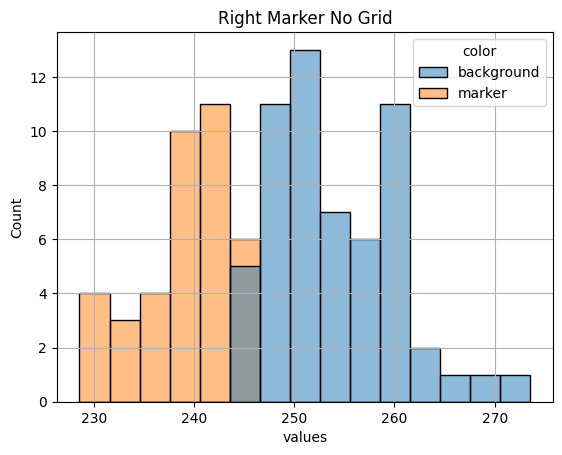

In [29]:

df_right = pd.DataFrame(w_right.ravel())
trsh = 245
df_right['color'] = np.where(df_right[0]<=trsh, "marker", "background")
df_right.rename(columns={0: "values"}, inplace=True)
sns.histplot(data=df_right, x="values", hue="color", binwidth=3)
plt.title("Right Marker No Grid")
plt.grid()
plt.show()

## Looking at Grid

### **Right bottom marker with tungsten grid**

Box shape in bins: (8, 12)


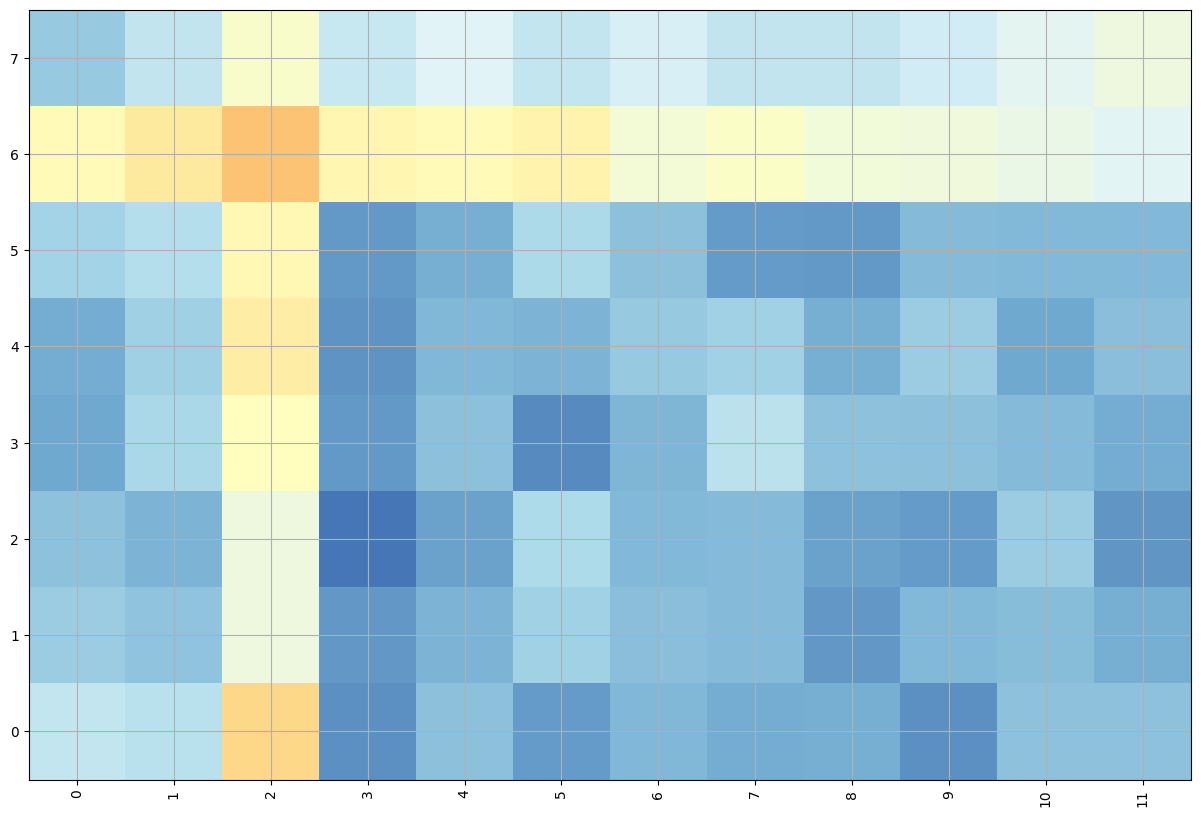

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
#                 Y     X
w_grade = w_new[19:27, 92:104]
y_grade = range(w_grade.shape[0])   # Rows
x_grade = range(w_grade.shape[1])   # Columns
ax.pcolormesh(x_grade, y_grade, w_grade, cmap="RdYlBu", vmin=0, vmax=80)
plt.xticks(x_grade, rotation=90)
plt.yticks(y_grade)
printMD("### **Right bottom marker with tungsten grid**")
print("Box shape in bins:",w_grade.shape)
plt.grid()
plt.show()

[-3.66776084e-01  9.33319166e+00  4.14196416e+02]


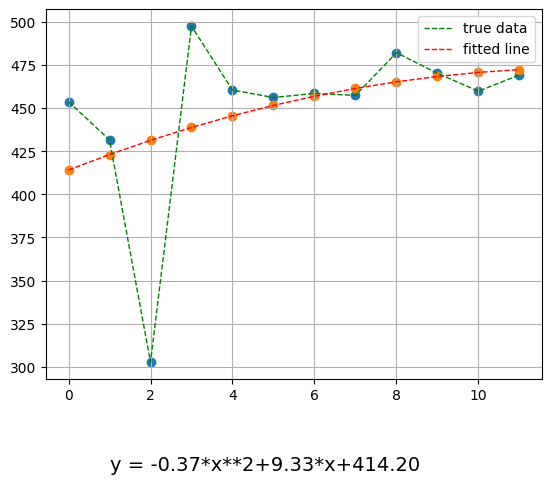

In [60]:
w_markers_cropped = w_grade
w_markers_summed = w_markers_cropped.sum(axis=0)
#define data
y = w_markers_summed
x = np.arange(len(y))
#find line of best fit
z = np.polyfit(x, y, 2, full=False, cov=False)

#add points to plot
plt.scatter(x, y)
plt.plot(x, y, '--', lw=1, c='green', label='true data')
print(z)
#add line of best fit to plot
# plt.plot(x, a*x+b) 
y_pred = z[0]*x**2+z[1]*x+z[-1]
plt.scatter(x, y_pred)
plt.plot(x, y_pred, '--', lw=1, c='r', label='fitted line')
plt.text(1, 240, f'y = {z[0]:.2f}*x**2+{z[1]:.2f}*x+{z[-1]:.2f}', size=14)
plt.legend()
plt.grid()
plt.show()

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [-3.66776084e-01  9.33319166e+00  4.14196416e+02]


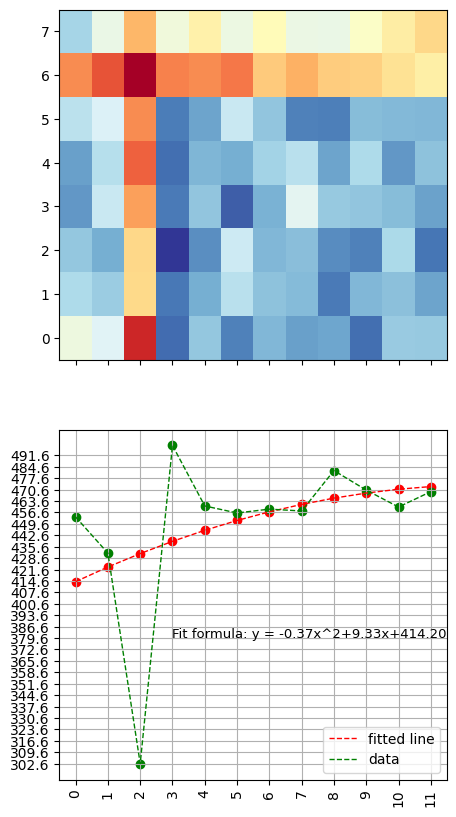

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

# Upper pcolormesh
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_grade
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(3, 380, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=9.5, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.grid()
plt.show()

### Histogram of all data

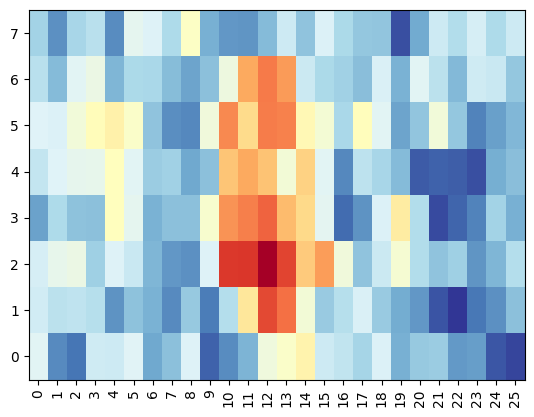

In [39]:
# # Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 5:-43]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

# w_onebin = w_markers[35:39, 5:-43]
# x_onebin = range(w_onebin.shape[1])     # Columns   (_, this)
# y_onebin = range(w_onebin.shape[0])     # Rows      (this, _)
  
plt.pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)
plt.show()

(array([1., 2., 4., 4., 1., 3., 3., 4., 1., 3.]),
 array([247.38386536, 249.61682129, 251.84979248, 254.08276367,
        256.31573486, 258.54867554, 260.78164673, 263.01461792,
        265.24755859, 267.48052979, 269.71350098]),
 <BarContainer object of 10 artists>)

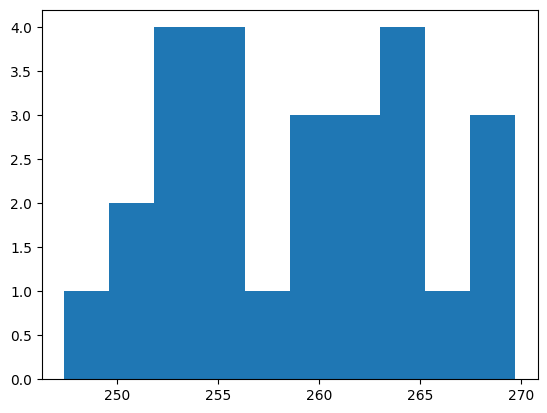

In [41]:
plt.hist(w_markers_cropped[0])

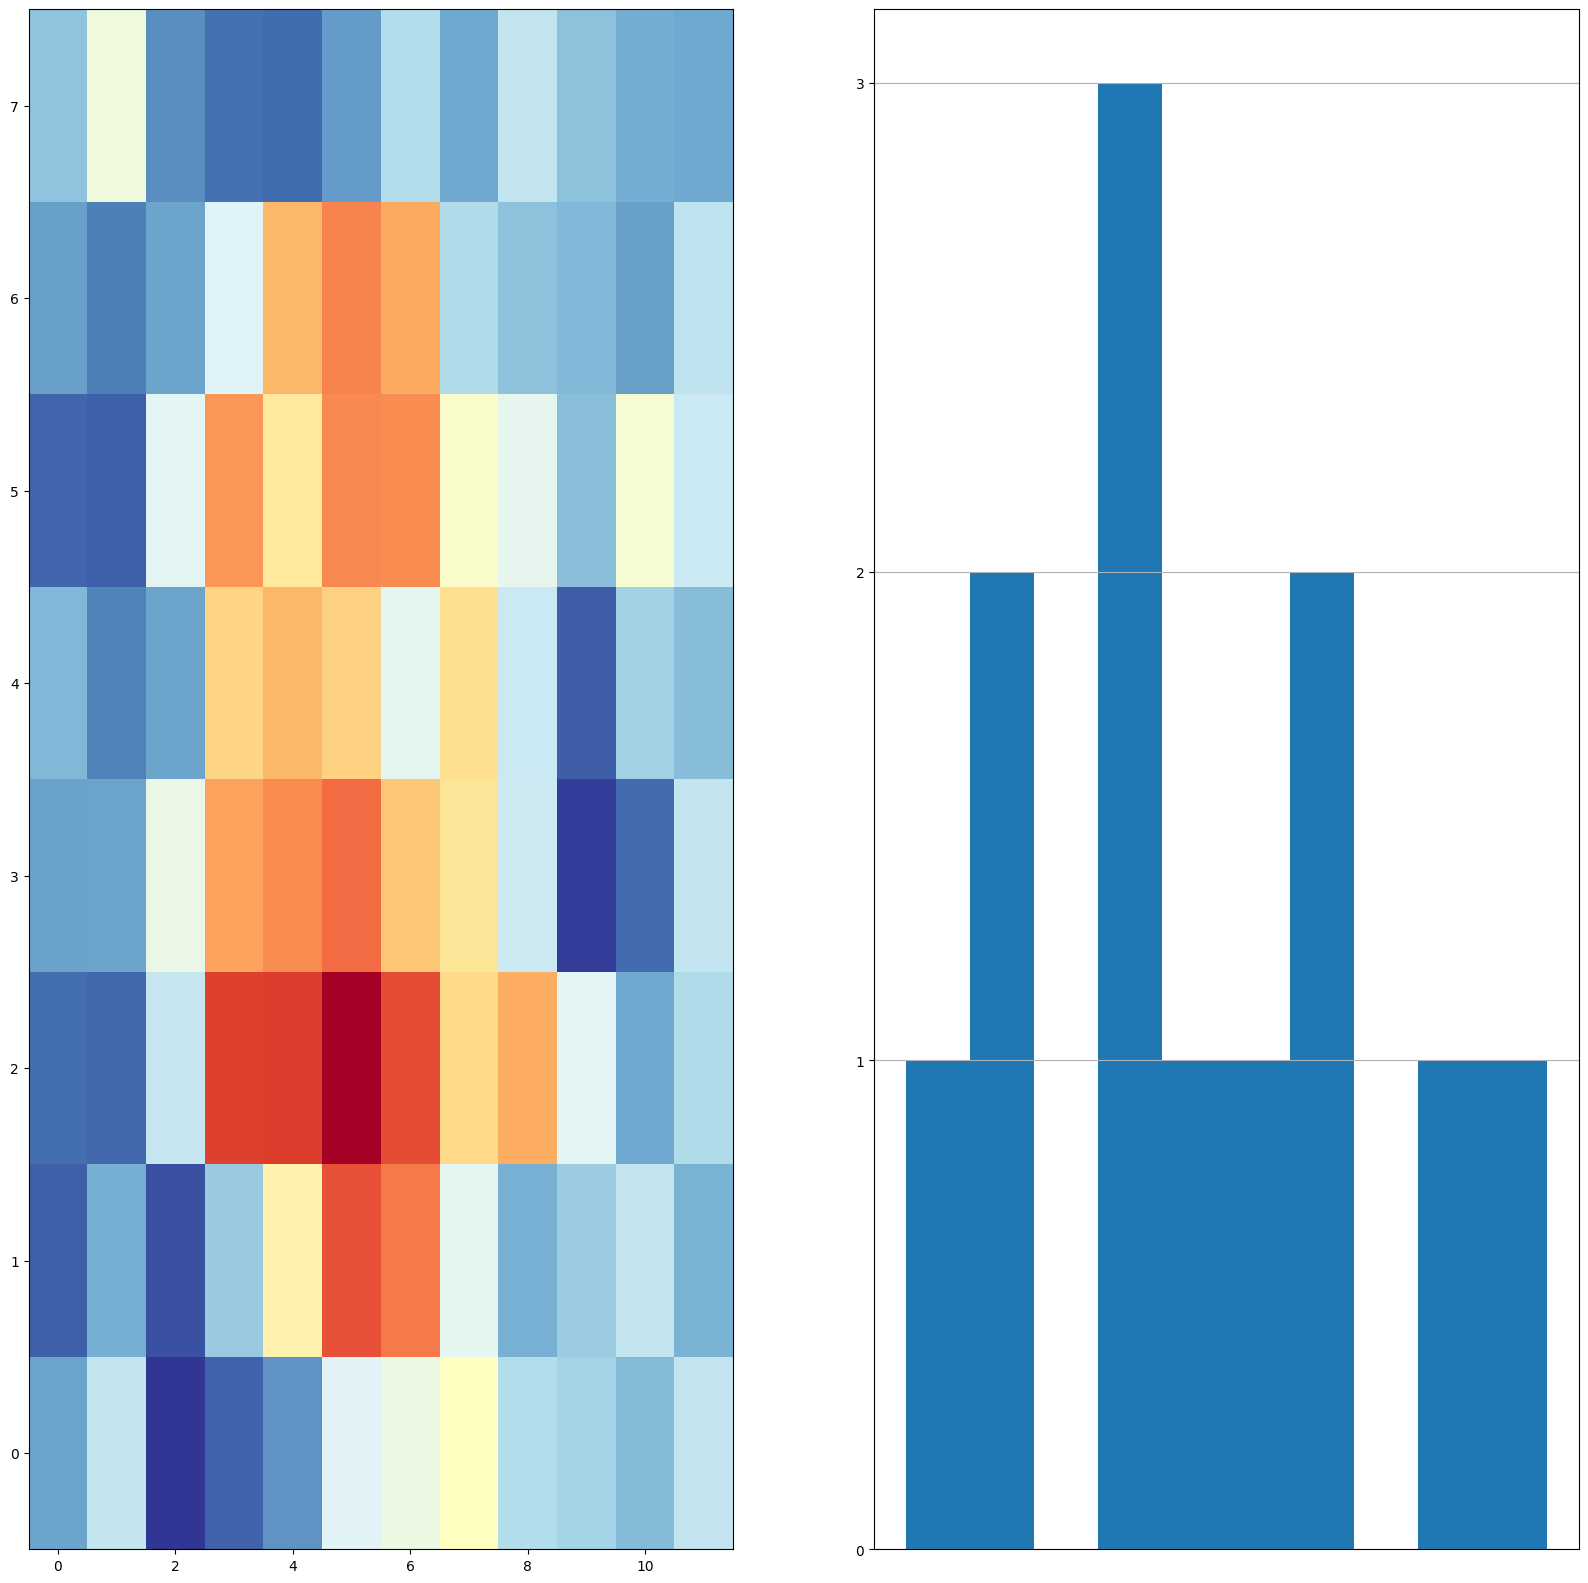

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 12:-50]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Right histogram
ax[1].hist(w_markers_cropped[0], bins=10)
# # Lower scatterplot
# _axis = 0 # 0 - keeps x; 1 - keeps y
# w_markers_summed = -w_markers_cropped.sum(axis=_axis)
# x_markers_summed = np.arange(len(w_markers_summed))
# ax[1].hist(w_markers_summed)
# ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
plt.grid()
plt.show()

### Histogram of one y-bin

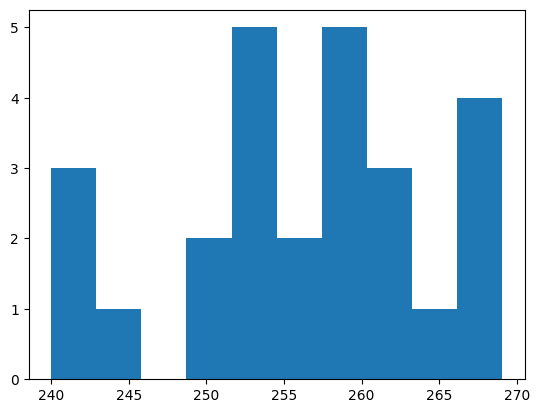

[[255.67865 253.35094 252.50774 252.2294  248.81255 253.00484 258.93314
  258.45682 262.32913 260.06683 242.27892 240.00514 242.08543 250.6481
  243.35213 252.9303  264.90198 256.11218 257.93744 260.6252  268.05835
  267.65356 268.00836 269.03854 261.87976 260.21194]]


In [32]:
w_onebin = w_markers[35:36, 5:-43]
x_onebin = range(w_onebin.shape[1])     # Columns   (_, this)
y_onebin = range(w_onebin.shape[0])     # Rows      (this, _)
plt.hist(w_onebin[0])
plt.show()
print(w_onebin)

ValueError: not enough values to unpack (expected 2, got 1)

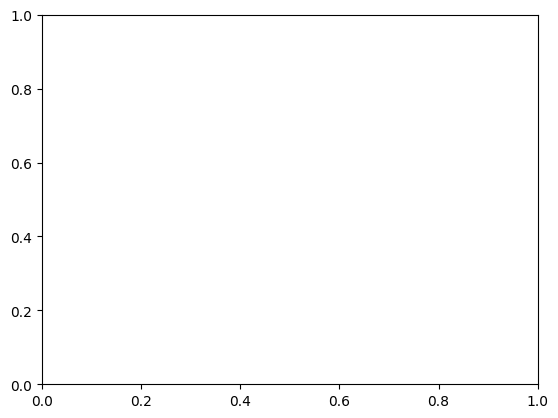

In [27]:
w_onebin = w_markers[35:36, 5:-43]
x_onebin = range(w_onebin.shape[1])     # Columns   (_, this)
y_onebin = range(w_onebin.shape[0])     # Rows      (this, _)
  
plt.pcolormesh(x_onebin, y_onebin, w_onebin, cmap="RdYlBu")
plt.xticks(x_onebin, rotation=90)
plt.yticks(y_onebin)
plt.show()
print(w_onebin[0])

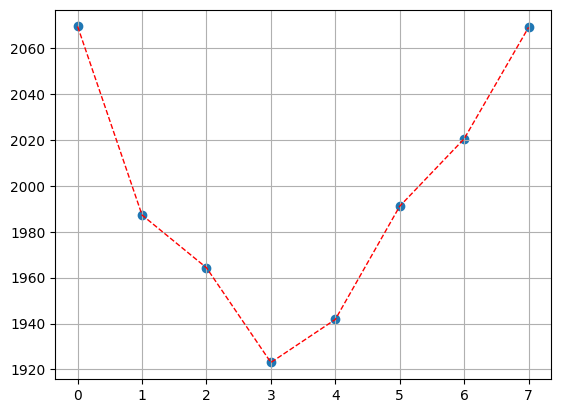

In [100]:
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[31:39, 14:-52]
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
plt.scatter(x_markers_summed, w_markers_summed)
plt.plot(x_markers_summed, w_markers_summed, '--', lw=1, c='r')
plt.xticks(x_markers_summed)
plt.grid()
plt.show()

[  10.6344728   -71.31675575 2059.32557678]


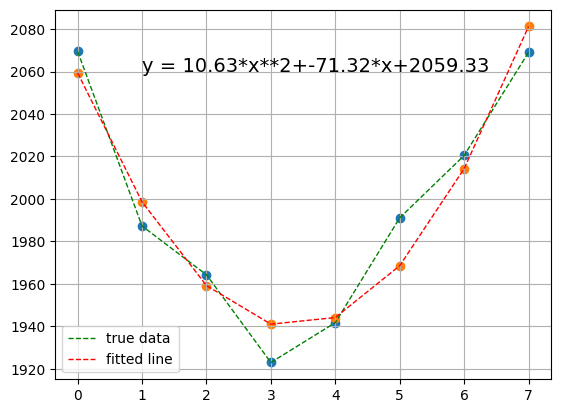

In [101]:
#define data
x = x_markers_summed
y = w_markers_summed
x = np.arange(len(y))
#find line of best fit
z = np.polyfit(x, y, 2, full=False, cov=False)

#add points to plot
plt.scatter(x, y)
plt.plot(x, y, '--', lw=1, c='green', label='true data')
print(z)
#add line of best fit to plot
# plt.plot(x, a*x+b) 
y_pred = z[0]*x**2+z[1]*x+z[-1]
plt.scatter(x, y_pred)
plt.plot(x, y_pred, '--', lw=1, c='r', label='fitted line')
plt.text(1, 2060, f'y = {z[0]:.2f}*x**2+{z[1]:.2f}*x+{z[-1]:.2f}', size=14)
plt.legend()
plt.grid()
plt.show()

In [84]:
import matplotlib.pyplot as plt
from scipy import odr
x = np.linspace(0.0, 5.0)
y = np.sin(x)
poly_model = odr.polynomial(3)  # using third order polynomial model
data = odr.Data(x, y)
odr_obj = odr.ODR(data, poly_model)
output = odr_obj.run()  # running ODR fitting
poly = np.poly1d(output.beta[::-1])
poly_y = poly(x)
plt.plot(x, y, label="input data")
plt.plot(x, poly_y, label="polynomial ODR")
plt.legend()
plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

(array([1., 1., 1., 1., 1., 1., 0., 0., 3., 2.]),
 array([1923.05102539, 1939.68286133, 1956.31481934, 1972.94665527,
        1989.57861328, 2006.21044922, 2022.84228516, 2039.47424316,
        2056.10620117, 2072.73803711, 2089.36987305]),
 <BarContainer object of 10 artists>)

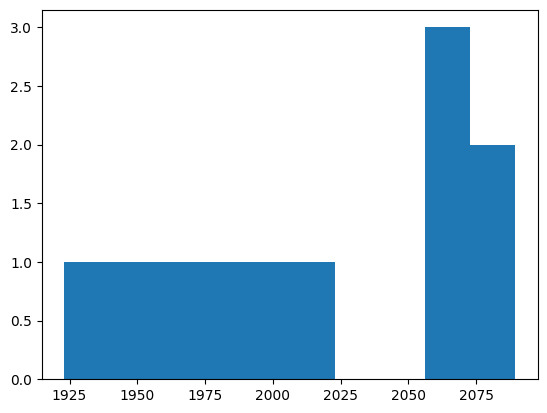

In [58]:
plt.hist(w_markers_summed)

## Fitting

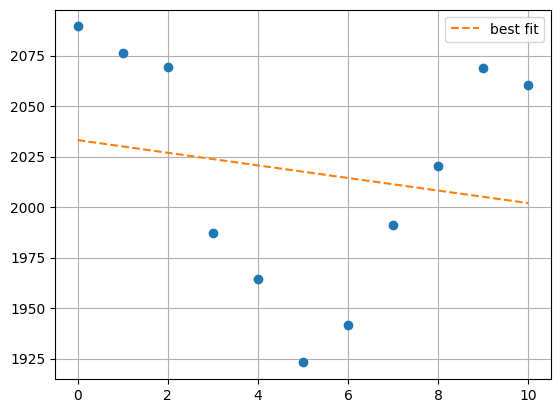

In [57]:
from lmfit.models import Model, GaussianModel
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

# def line(x, slope, intercept):
#     """a line"""
#     return slope*x + intercept

mod  = GaussianModel(prefix='g1_')
pars = mod.guess(w_markers_summed, x=x_markers_summed)
# pars = mod.make_params(amp=1925, cen=5, wid=5)

result = mod.fit(w_markers_summed, pars, x=x_markers_summed)

plt.plot(x_markers_summed, w_markers_summed, 'o')
# plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
plt.plot(x_markers_summed, result.best_fit, '--', label='best fit')
plt.legend()
plt.grid()
plt.show()

In [55]:
comps = result.eval_components(x=x_markers_summed)
comps

{'gaussian': array([2033.13269846, 2029.9940474 , 2026.85979397, 2023.72993277,
        2020.6044584 , 2017.48336546, 2014.36664858, 2011.25430235,
        2008.1463214 , 2005.04270036, 2001.94343386])}

In [57]:
ress = comps['gaussian']
ress

array([2033.13269846, 2029.9940474 , 2026.85979397, 2023.72993277,
       2020.6044584 , 2017.48336546, 2014.36664858, 2011.25430235,
       2008.1463214 , 2005.04270036, 2001.94343386])

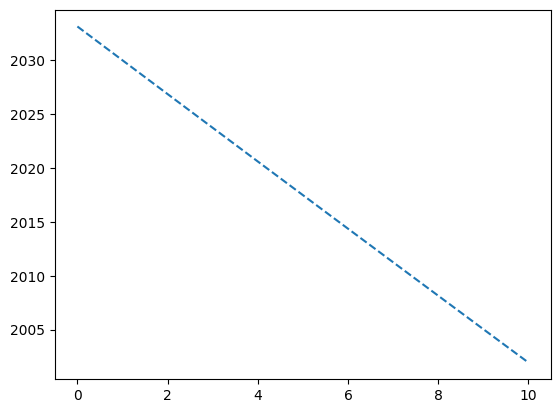

In [58]:
comps = result.eval_components(x=x)
# plt.plot(x, y)
plt.plot(x_markers_summed, ress, '--', label='gaussian')

### Scipy

In [42]:
from scipy.optimize import curve_fit

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))
# guess = []
parameters, covariance = curve_fit(gaussian, x_markers_summed, w_markers_summed, p0=[-1925, 12, 4], maxfev=1000)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [39]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

-4073651396.1115546
-7618.595809278799


/tmp/ipykernel_2347/3302932963.py:4: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


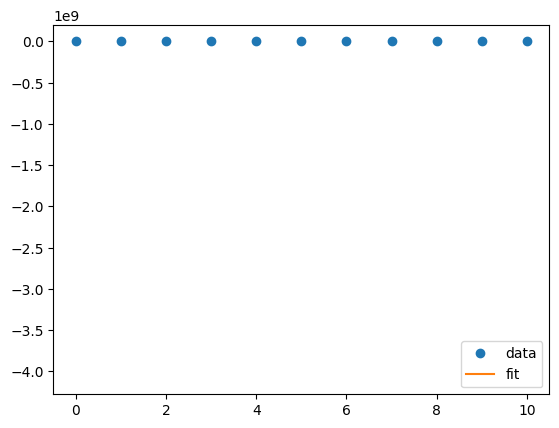

In [40]:
fit_y = Gauss(x_markers_summed, fit_A, fit_B)
plt.plot(x_markers_summed, w_markers_summed, 'o', label='data')
plt.plot(x_markers_summed, fit_y, '-', label='fit')
plt.legend()

In [ ]:
from lmfit.models import ExponentialModel, GaussianModel, VoigtModel

# Exponent
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)


# Gauss

voigt1 = VoigtModel(prefix='v1_')
pars.update(voigt1.make_params())

pars['v1_center'].set(value=3, min=1, max=5)
pars['v1_sigma'].set(value=0.1, min=0.05)
pars['v1_amplitude'].set(value=623, min=200)

voigt2 = VoigtModel(prefix='v2_')
pars.update(voigt2.make_params())

pars['v2_center'].set(value=16, min=16, max=18)
pars['v2_sigma'].set(value=0.1, min=0.05)
pars['v2_amplitude'].set(value=623, min=200)

voigt3 = VoigtModel(prefix='v3_')
pars.update(voigt3.make_params())

pars['v3_center'].set(value=28, min=25, max=30)
pars['v3_sigma'].set(value=0.1, min=0.05)
pars['v3_amplitude'].set(value=623, min=200)

mod = voigt1+voigt2+voigt3 + exp_mod
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)